---
---

# Employee Salary Prediction Using ML Algorithms

---
---

## 1. Importing the Libraries :-

In [2]:
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # for visualization
import pandas as pd  #  manipulate and preprocess data.
import numpy as np  # To perfrom numerical computations.

## 2. Importing the Data :-


In [293]:
df = pd.read_csv ("/content/Adult_Dataset.csv")  #  loading the CSV Data and converted into the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [287]:
print(df) # display dataframe contains data


       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

#  3. Column Descriptions( understanding)

*   **age**

          The person's age in years — helps us see how age may affect income.
*   **workclass**
         Describes who the person works for — like private companies, government, or self-employed.

*   fnlwgt
         A census-assigned weight showing how many people this one person represents in the population.

       

*  education-

         The highest education level the person completed, such as high school, college, etc.

*   educational-num

         A number version of the education level — helpful for models that prefer numbers.
*   marital-status
          
          Describes if someone is married, single, divorced, etc., which might relate to income stability.

*   occupation
          The kind of job they do — like managers, tech support, sales, etc.
*   relationship
           Shows the person’s role in their household — like spouse, child, or not in a family.

*   race
           The individual’s race, used carefully to study fairness or bias in income trends.

*   gender
           Whether the person is male or female — important for understanding gender income gaps.
*   capital-gain
            Money they made from investments (not their job) — most people have 0 here.

*   capital-loss
            Money lost from investments — again, usually zero for most people.

*  hours-per-week
            How many hours they typically work in a week — more hours could mean higher income.

*  native-country
            The country they were born in — mostly U.S., but includes others too.
*   income
           The target column — shows whether a person earns more than $50K or not.

In [288]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [289]:
df.isna().sum()# check if their no null values present in any column

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


### Statistical Observations

| Statistic                                    | What it means                                                | Appears for…                 |
| -------------------------------------------- | ------------------------------------------------------------ | ---------------------------- |
| **count**                                    | How many non‑missing rows the column has                     | All columns                  |
| **mean / std / min / 25% / 50% / 75% / max** | Usual numeric summary (average, spread, quartiles, extremes) |  Numeric columns only        |
| **unique**                                   | Number of distinct categories                                | Categorical (object) columns |
| **top / freq**                               | Most common category and how often it appears                | Categorical columns          |


In [290]:
for col in df.columns:# all categorirs in dataset according to each column in datset
    print(f"--- {col} ---")
    print(df[col].unique())
    print()


--- age ---
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

--- workclass ---
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

--- fnlwgt ---
[226802  89814 336951 ... 129912 255835 257302]

--- education ---
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

--- educational-num ---
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

--- marital-status ---
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

--- occupation ---
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-ma

In [291]:
df.describe()# to generate summary statistics of  dataset.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [292]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


---
#  4.  EDA ( Exploratory Data Analysis )

  Main goal here is to understand each column in depth what kind of data it holds, whether it has any issues, and how it might contribute to the prediction of income. like--


*   
  Look at its data distribution
  (either value counts or visualizations)


*  
Check for any inconsistencies, missing data, or outliers


*   Perform any basic cleaning or
   transformation needed to prepare the data

The purpose of this step is to clean the dataset and make it as error-free and consistent

## Data Preprocessing for column "age"

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
df['age']

,age
0,25
1,38
2,28
3,44
4,18
...,...
48837,27
48838,40
48839,58
48840,22


In [19]:
df['age'].shape # check how many rows of data in column(age) :  48,842.

(48842,)

In [21]:
df['age'].dtype  # check the datatype

dtype('int64')

In [22]:
df['age'].nunique()  # check unique category in age column : 74

74

In [23]:
df['age'].isna ().sum ()  # checking for any null values of missing value in dataset :0

np.int64(0)

In [ ]:
df['age'].describe()  # This will provide me "Statistical Summary" for the column age.

### Important note :-

To ensure data consistency, I decided to filter the age column:

Minimum Age Issue: Ages below 18 are considered minors and are unlikely to be earning; hence, such entries are removed.

Maximum Age Issue: Ages above 60 are typically beyond the general retirement age (based on global research showing retirement between 58–60), so these entries are also excluded.

--> Final Filter Applied: Retained only records where 18 ≤ age ≤ 60.

In [32]:
df.shape  #  Before removal i have 48,842 Rows.

(48842, 15)

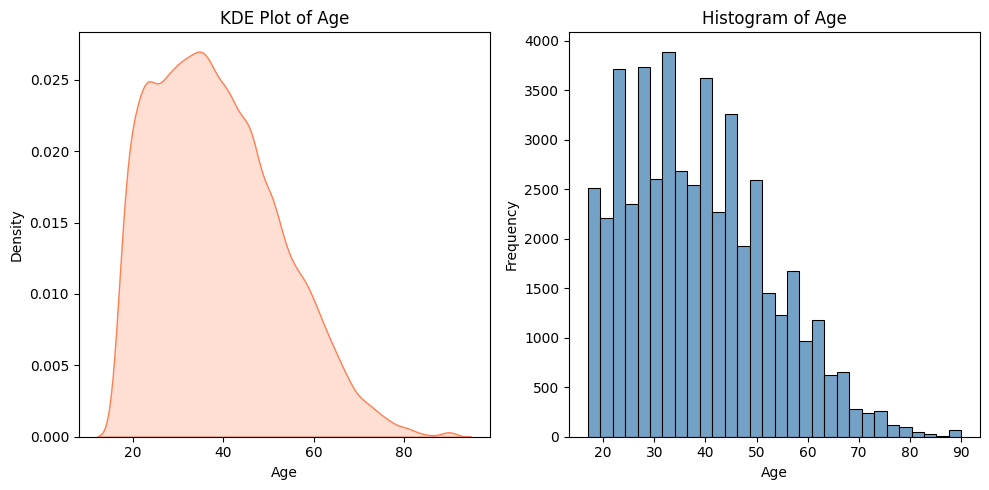

In [34]:

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Seaborn KDE plot
sns.kdeplot(data=df, x='age', fill=True, color='coral', ax=axes[0])
axes[0].set_title('KDE Plot of Age', fontsize=12)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
# Seaborn histogram (without KDE)
sns.histplot(data=df, x='age', bins=30, color='steelblue', edgecolor='black', kde=False, ax=axes[1])
axes[1].set_title('Histogram of Age', fontsize=12)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Interpretation :-

---> So with the **Histogram and KDE Plot** side by side i have got **Good Insights in relation to Data Distribution for the column age** :-

- By looking at the **Histogram** i get to know that as the Age is Increasing the frequency is decreasing and that is very logical also. I see majority of the people fall in a age of range from 18 till 50.

- The **KDE Plot** tells me that for the column age i have **Slightly Positively Skewed Data** there are few people with high age and majority of the people have a less age and they are concentrated in a age range from 18 to 50.

I am sure that when i will remove the age which is less than 18 and greater than 60 my Data Distribution will become more compact or i can say more less skewed resulting into "Nearly Normal Distribution".

In [35]:
# filter age : keep it between 18 and 60
df = df[(df['age'] >= 18) & (df['age'] <= 60)]
df.shape

(44641, 15)

In [36]:
48842 - 44641  # Doing some calculation.
percent_removed = (4201 / 48842) * 100
print(f"Percentage removed: {percent_removed:.2f}%")

Percentage removed: 8.60%


---> **8% of the age data was unnecessary so it was removed.**

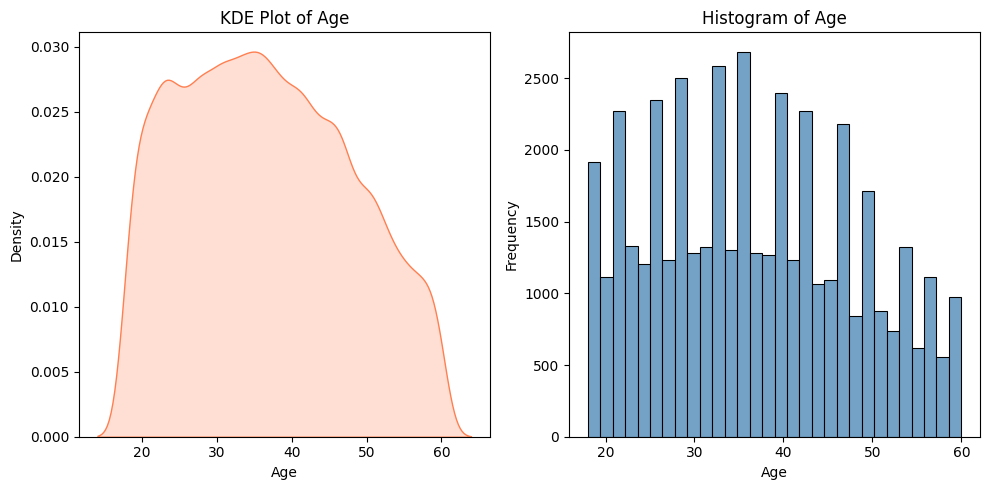

In [37]:

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Seaborn KDE plot
sns.kdeplot(data=df, x='age', fill=True, color='coral', ax=axes[0])
axes[0].set_title('KDE Plot of Age', fontsize=12)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
# Seaborn histogram (without KDE)
sns.histplot(data=df, x='age', bins=30, color='steelblue', edgecolor='black', kde=False, ax=axes[1])
axes[1].set_title('Histogram of Age', fontsize=12)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [38]:
df['age'].skew()  # This will showcase me the skewness value.

np.float64(0.21274011878284105)

### Interpretation :-

---> As Expected now the column age has now turned into a **Normal Distribution** after i removed unnecessary age which were less than 17 and greater than 60. The skewness value is 0.21 telling me that the data is very slightly positively skewed or i can also say that the data is nearly almost "Normally Distributed".

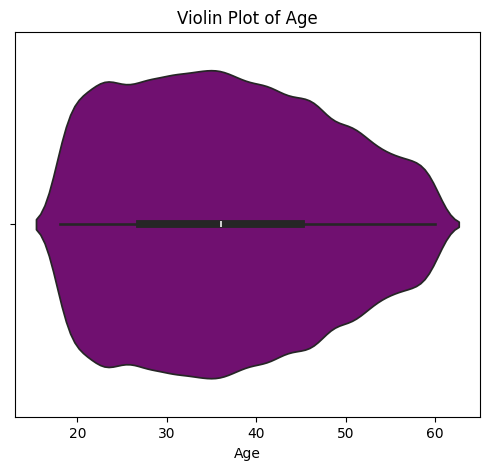

In [39]:
plt.figure(figsize=(6, 5))
sns.violinplot(x=df['age'], color='purple', inner='box')
plt.title('Violin Plot of Age', fontsize=12)
plt.xlabel('Age')
plt.show()


### Interpretation :-



- In the **Violin Plot** i can clearly see that the data is **Almost Normally Distributed** or i can say it is "very slightly positively skewed".

### Conclusion for Data Preprocessing of column "age" :-

I have thoroughly preprocessed the "age" column by handling missing values, detecting outliers, and analyzing data distribution through various visualizations. Notably, I filtered out ages below 18 and above 60, as these values were not relevant to the project. Now, the "age" column is clean and ready for further analysis.

## Data Preprocessing for column "workclass"

In [40]:
df['workclass']

,workclass
0,Private
1,Private
2,Local-gov
3,Private
4,?
...,...
48837,Private
48838,Private
48839,Private
48840,Private


---> From above- **Noticed an inconsistency which is Question Mark Data ( ? )** so we need to first check how many number of type it will occur then decide can we remove it or not.

In [43]:
(df['workclass']== '?').sum() # there are 1997 time "?" marks are in column


np.int64(1997)

In [41]:
df['workclass'].nunique()  # check unique category in workclass column : 9

9

In [44]:
df['workclass'] = df['workclass'].astype('category')  # Converting the column to correct data type which is "categroy".

/tmp/ipython-input-44-1116656151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].astype('category')  # Converting the column to correct data type which is "categroy".


In [45]:
df['workclass'].dtype  # Now the columns data type is correct which is "Categorical".


CategoricalDtype(categories=['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
                  'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
                  'Without-pay'],
, ordered=False, categories_dtype=object)

In [46]:
df['workclass'].value_counts()  # Seeing the frequency of unique data present in this column.

,count
workclass,
Private,31765
Self-emp-not-inc,3290
Local-gov,2882
?,1997
State-gov,1868
Self-emp-inc,1473
Federal-gov,1346
Without-pay,12
Never-worked,8


In the workclass column, most people work in the Private sector, while a few belong to government or self-employed roles.

   * About 1,997 entries have '?', which is too many to drop, so I’ll replace them with a new category called ‘Other’.
   *

   Rare categories like   ‘Without-pay’ (12) and ‘Never-worked’ (8) don’t fit income prediction, so I’ll remove those rows.

This way, I clean the data without losing too much valuable information.

In [47]:
df['workclass'].shape  # Before Removal : 44641

(44641,)

In [48]:
# Filtering (Remove)
df = df [(df['workclass'] != 'Without-pay') & (df['workclass'] != 'Never-worked')]

# Drop unused category labels to keep it clean
df['workclass'] = df['workclass'].cat.remove_unused_categories()

/tmp/ipython-input-48-102736935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].cat.remove_unused_categories()


In [50]:
df['workclass'].shape  # After Removal : 44,621.

(44621,)

In [51]:
df['workclass'].value_counts()

,count
workclass,
Private,31765
Self-emp-not-inc,3290
Local-gov,2882
?,1997
State-gov,1868
Self-emp-inc,1473
Federal-gov,1346


In [53]:
df['workclass'] = df['workclass'].replace ( "?" , "Others" )  # Replacing the question mark (?) category with name  "Others".
df['workclass'].value_counts()

,count
workclass,
Private,31765
Self-emp-not-inc,3290
Local-gov,2882
Others,1997
State-gov,1868
Self-emp-inc,1473
Federal-gov,1346


In [54]:
df['workclass'].isna().sum() #after removing the inconsistency now check having any null of inconsistency or not

np.int64(0)

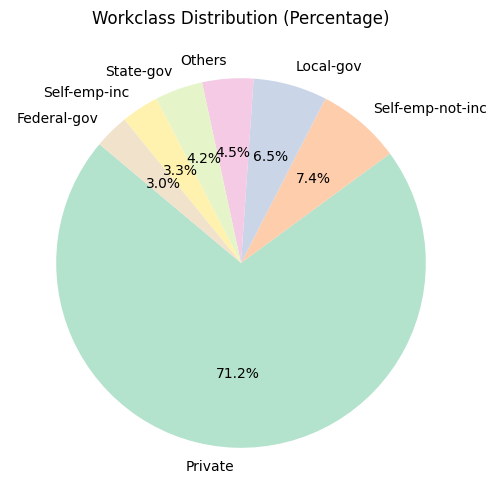

In [58]:
# Calculate percentages
workclass_percent = workclass_counts / len(df) * 100

plt.figure(figsize=(8, 6))
plt.pie(workclass_percent.values,
        labels=workclass_percent.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel2.colors)
plt.title('Workclass Distribution (Percentage)', fontsize=12)

plt.show()

### Conclusion for Data Preprocessing of column "workclass" :-

I have preprocessed the data for the column "workclass" went through all the essential things like missing data , outliers , data distribution etc.. also through different visualizations i observed the datas characteristics and patterns.

Most Importantly this column had some inconsistencies which were unnecessary for our given project so i  **cleaned the data by filtering out the unnecessary categories and also replaced** . With this the column "workclass" is fully preprocessed and can be used for further processes.

## Data Preprocessing for column "fnlwgt

The fnlwgt (final weight) column is used by the U.S. Census Bureau to indicate how many people each row represents in the population. It's designed for statistical weighting in surveys, not for making predictions about individuals.

In predictive modeling — especially binary classification tasks like yours (predicting whether income > $50K) — we focus on features that describe an individual, not how many others they represent.

Key points from trusted sources:

* Kaggle notebooks & ML blogs: Most top solutions drop fnlwgt for individual income prediction tasks.

* Stack Overflow & ML forums: Repeated consensus is that fnlwgt adds no predictive power for individual classification.

* Academic context: It’s primarily used in weighted statistical estimates, not supervised learning models.

* Including fnlwgt might introduce bias or noise, misleading the model by overemphasizing patterns that reflect sampling distribution, not income determinants.

   [link text](https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf?utm_source=chatgpt.com)

   **Final Decision**:
   Dropping fnlwgt is the correct move.

It does not help your model understand individuals, and its presence may reduce model performance.
This decision is fully supported by machine learning best practices.

In [59]:
df['fnlwgt']

,fnlwgt
0,226802
1,89814
2,336951
3,160323
4,103497
...,...
48837,257302
48838,154374
48839,151910
48840,201490


In [60]:
df.columns  # So before removal

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [61]:
df.drop('fnlwgt', axis = 1, inplace = True)  # I am  removing the column "fnlwgt" from the dataframe.

In [62]:
df.columns  # So after removal the column "fnlwgt" is no more it has been dropped successfully.

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

## Data Preprocessing for column "education" and "educational-num"

In [ ]:
df.columns  #  Display all the column names present in the dataframe

In [63]:
df[['education', 'educational-num']]  # Both these columns are similar only.

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
...,...,...
48837,Assoc-acdm,12
48838,HS-grad,9
48839,HS-grad,9
48840,HS-grad,9


In [64]:
df['education'].nunique()  # number of unique data in the column "education" is 16.

16

In [65]:
df['educational-num'].nunique()  # Number of unique data in the column "education" is also 16.

16

In [69]:
df['education'].value_counts()  # check  unique data and its frequency

,count
education,
HS-grad,14540
Some-college,10313
Bachelors,7566
Masters,2456
Assoc-voc,1958
Assoc-acdm,1538
11th,1430
10th,1032
Prof-school,731


In [70]:
df['educational-num'].value_counts()  # unique data and its frequency

,count
educational-num,
9,14540
10,10313
13,7566
14,2456
11,1958
12,1538
7,1430
6,1032
15,731


In [71]:
df['education'].isna().sum()  # The column "education" has no missing data.

np.int64(0)

In [72]:
df['educational-num'].isna().sum()  # The column "education" also has no missing data.

np.int64(0)

While exploring the data, I noticed that education and educational-num mean the same thing — just in different formats (text vs. number). Since they are redundant, I don’t need both.

I chose to keep education because:

* It’s easier to understand (e.g., “Bachelors” is clearer than “13”).

* Working with readable categories helps avoid mistakes during preprocessing.

Later, when I prepare the data for modeling, I’ll convert all columns (including education) to numbers using encoding.
So for now, I’m dropping educational-num to keep things simple and clean.

In [73]:
df.drop('educational-num', axis=1, inplace=True )

In [74]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

## Peforming EDA & Data Preprocessing on the column "education"

In [75]:
df['education'].isna().sum()  # Tcheck missing data

np.int64(0)

In [76]:
df['education'].nunique() # check unique category : 16

16

In [77]:
df['education'].value_counts()

,count
education,
HS-grad,14540
Some-college,10313
Bachelors,7566
Masters,2456
Assoc-voc,1958
Assoc-acdm,1538
11th,1430
10th,1032
Prof-school,731


At first, I saw some education levels like 'Preschool', '10th', and '12th' in my data. I thought these might be kids still in school, so I thought about removing them since my project is about adults.

But before doing that, I checked those records carefully. I found out these people were actually adults — they had valid ages and jobs. This showed me that these education levels mean the highest school grade adults completed, not that they are children.

Since I had already removed kids by filtering out ages under 18, it made sense these were adults with only school-level education.

So, I decided to keep these categories because they are real and important for the project.

The main lesson I learned is: don't just guess about your data — always check and understand it before making changes.



/tmp/ipython-input-80-3769012267.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='viridis')


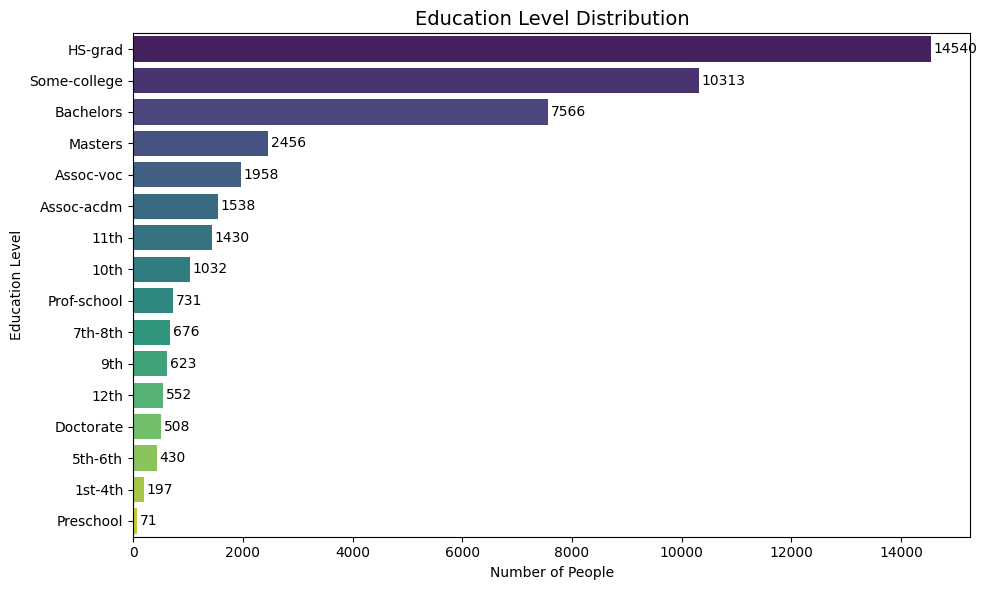

In [80]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='viridis')

plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Number of People')
plt.ylabel('Education Level')

# Add value labels on bars
counts = df['education'].value_counts()
for i, val in enumerate(counts):
    plt.text(val + 50, i, str(val), va='center')

plt.tight_layout()
plt.show()


### Interpretation :

The "education" column in my data is imbalanced — some education levels like "HS-grad" and "Some-college" have many people, while others like "Preschool" or "1st-4th" have very few.

Also, there are many unique education categories, which makes the data complex.

To simplify, I grouped similar education levels together (called binning). For example:

* Preschool and early grades like '1st-4th', '5th-6th', '7th-8th' become Elementary.

* Grades '9th' to '12th' become HighSchool.

* 'HS-grad' and 'Some-college' are grouped as Graduate.

* Associate degrees are combined as Associate.

* Higher education levels like 'Bachelors', 'Masters', 'Doctorate', and 'Prof-school' are kept separate because each means something important.

This way, I reduce the number of categories from 16 to 8.

The benefits of doing this are:

* The data becomes easier to understand and work with.

* It helps machine learning models perform better because there are fewer categories to handle.

* It keeps important details, especially for higher education levels, so we don’t lose meaningful information.

In short, binning helps simplify the data while keeping the key education differences clear.

In [83]:
# Defining binning map for education levels
education_map = {
    'Preschool': 'Elementary',
    '1st-4th': 'Elementary',
    '5th-6th': 'Elementary',
    '7th-8th': 'Elementary',

    '9th': 'HighSchool',
    '10th': 'HighSchool',
    '11th': 'HighSchool',
    '12th': 'HighSchool',

    'HS-grad': 'Graduate',
    'Some-college': 'Graduate',

    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',

    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Prof-school'
}

# Applying the mapping to create a new binned column
df['education'] = df['education'].replace(education_map)

In [84]:
df['education'].nunique() # after binning i reduced categories from 16 to 8

8

In [85]:
df['education'].value_counts()

,count
education,
Graduate,24853
Bachelors,7566
HighSchool,3637
Associate,3496
Masters,2456
Elementary,1374
Prof-school,731
Doctorate,508


/tmp/ipython-input-86-4258851899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='viridis')


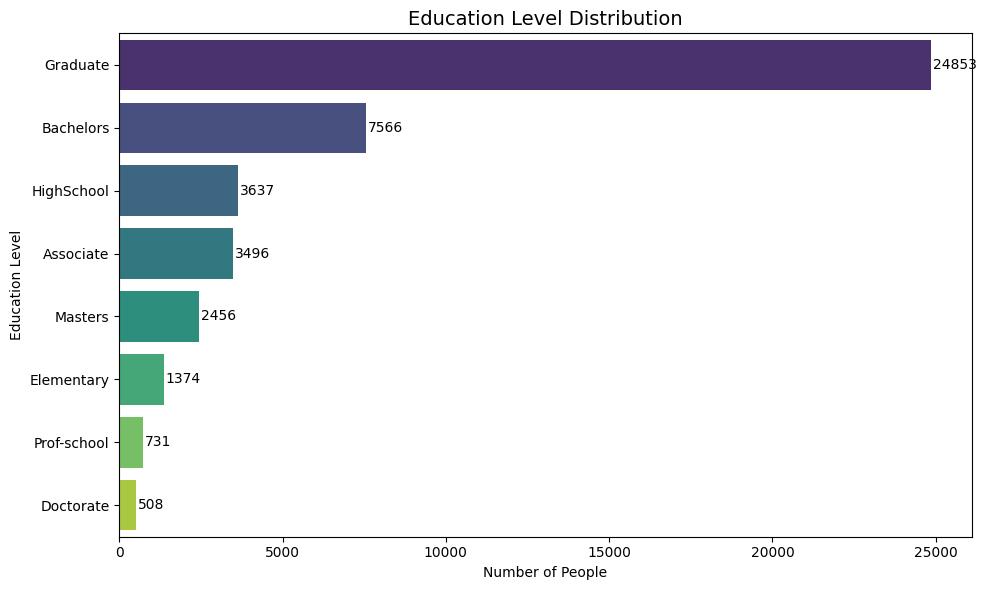

In [86]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='viridis')

plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Number of People')
plt.ylabel('Education Level')

# Add value labels on bars
counts = df['education'].value_counts()
for i, val in enumerate(counts):
    plt.text(val + 50, i, str(val), va='center')

plt.tight_layout()
plt.show()


In [87]:
df['education'].dtype  # The data type of this column is "object"

dtype('O')

In [88]:
df['education'] = df['education'].astype('category')  # Converting the columns data type to "category".

In [89]:
df['education'].dtype  # The data type of this column "education" is now correct which is "category".

CategoricalDtype(categories=['Associate', 'Bachelors', 'Doctorate', 'Elementary',
                  'Graduate', 'HighSchool', 'Masters', 'Prof-school'],
, ordered=False, categories_dtype=object)

### Conclusion: Preprocessing of "educational-num" and "education" columns
I have successfully completed preprocessing for the "educational-num" and "education" columns. I checked for things like missing values, outliers, and how the data is spread, using both analysis and visualizations.

One major issue I found was data redundancy — both columns were showing the same information in different forms. So, to simplify the data, I removed "educational-num" and kept only the "education" column.

Another issue I noticed was high cardinality in the "education" column — there were too many unique categories (like 18 different education levels). To fix this, I applied a technique called binning, where I grouped similar education levels together.

After binning, I reduced the categories from 18 to just 8, making the data cleaner and easier to use for future steps like machine learning.

Now, the "education" column is well-prepared and ready for further analysis or modeling.

## Data Preprocessing for column "marital-status"bold text

In [90]:
df['marital-status']

,marital-status
0,Never-married
1,Married-civ-spouse
2,Married-civ-spouse
3,Married-civ-spouse
4,Never-married
...,...
48837,Married-civ-spouse
48838,Married-civ-spouse
48839,Widowed
48840,Never-married


In [91]:
df['marital-status'].isna().sum()  # There are no missing data present in this column also.

np.int64(0)

In [92]:
df['marital-status'].value_counts()  # Seeing the unique values of the column and their respective frequencies.

,count
marital-status,
Married-civ-spouse,20236
Never-married,15304
Divorced,6228
Separated,1475
Widowed,759
Married-spouse-absent,583
Married-AF-spouse,36


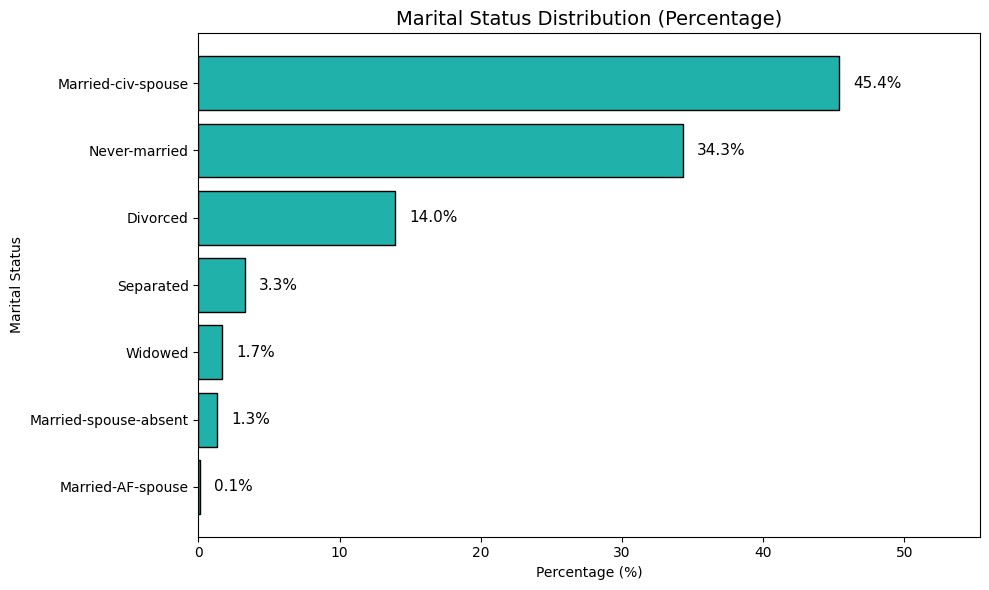

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage distribution
marital_percent = df['marital-status'].value_counts(normalize=True) * 100
marital_percent = marital_percent.sort_values()  # Sort for better visual flow

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(marital_percent.index, marital_percent.values, color='lightseagreen', edgecolor='black')

# Add percentage labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', fontsize=11)

plt.title('Marital Status Distribution (Percentage)', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Marital Status')
plt.xlim(0, max(marital_percent.values) + 10)  # Add some space for labels
plt.tight_layout()
plt.show()


In [99]:
df['marital-status'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [100]:
df['marital-status'] = df['marital-status'].astype('category')  # Converting the columns data type to "category".


In [101]:
df['marital-status'].dtype  # The data type of this column "marital-status" is now correct which is "category".

CategoricalDtype(categories=['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
                  'Married-spouse-absent', 'Never-married', 'Separated',
                  'Widowed'],
, ordered=False, categories_dtype=object)

In [102]:
df['marital-status'].mode()  # So the mode is "Married-civ-spouse".

,marital-status
0,Married-civ-spouse


### Conclusion: Preprocessing of "marital-status" Column

I have finished preprocessing the "marital-status" column. I checked everything important — like missing values, outliers, and how the data is distributed.

There was just one small issue:
The data type was set to "object", but since this column has repeated text values (like "Married", "Single", etc.), it made more sense to convert it to the "category" data type. This helps save memory and improves processing speed.

Now, the "marital-status" column is clean and ready for any further analysis or machine learning work.

## 4.6 Data Preprocessing for column "occupation" :-


In [103]:
df['occupation']

,occupation
0,Machine-op-inspct
1,Farming-fishing
2,Protective-serv
3,Machine-op-inspct
4,?
...,...
48837,Tech-support
48838,Machine-op-inspct
48839,Adm-clerical
48840,Adm-clerical


In [104]:
df['occupation'].isna().sum()

np.int64(0)

In [105]:
df['occupation'].value_counts()

,count
occupation,
Craft-repair,5845
Prof-specialty,5758
Exec-managerial,5638
Adm-clerical,5234
Sales,4974
Other-service,4408
Machine-op-inspct,2885
Transport-moving,2187
?,1997


While exploring this column, I found two small issues that needed fixing:

* Question Mark (?) as a Category
One of the entries was just a "?", which clearly isn’t a valid category. So I decided to replace it with a proper, meaningful category.

* Very Rare Category: Armed-Forces
The category "Armed-Forces" appeared only 15 times. Since that’s a very small number, I chose to remove those rows.
Reasons:

  * Too few samples to give useful insights.

  * Machine learning models can’t learn well from such rare data.

  * Also, armed forces aren’t typical employees — their salaries and structure are different from regular job roles.



In [106]:
df['occupation'] = df['occupation'].replace('?', 'Unknown') #Replacing the category "?" with "Unknown".

In [107]:
df['occupation'].value_counts() # checking --

,count
occupation,
Craft-repair,5845
Prof-specialty,5758
Exec-managerial,5638
Adm-clerical,5234
Sales,4974
Other-service,4408
Machine-op-inspct,2885
Transport-moving,2187
Unknown,1997


In [109]:
df = df[df['occupation'] != 'Armed-Forces']  # This will remove the occupation "Armed-Forces".

In [110]:
df['occupation'].value_counts()  # The occupation "Armed-Forces" has been successfully Removed.

,count
occupation,
Craft-repair,5845
Prof-specialty,5758
Exec-managerial,5638
Adm-clerical,5234
Sales,4974
Other-service,4408
Machine-op-inspct,2885
Transport-moving,2187
Unknown,1997


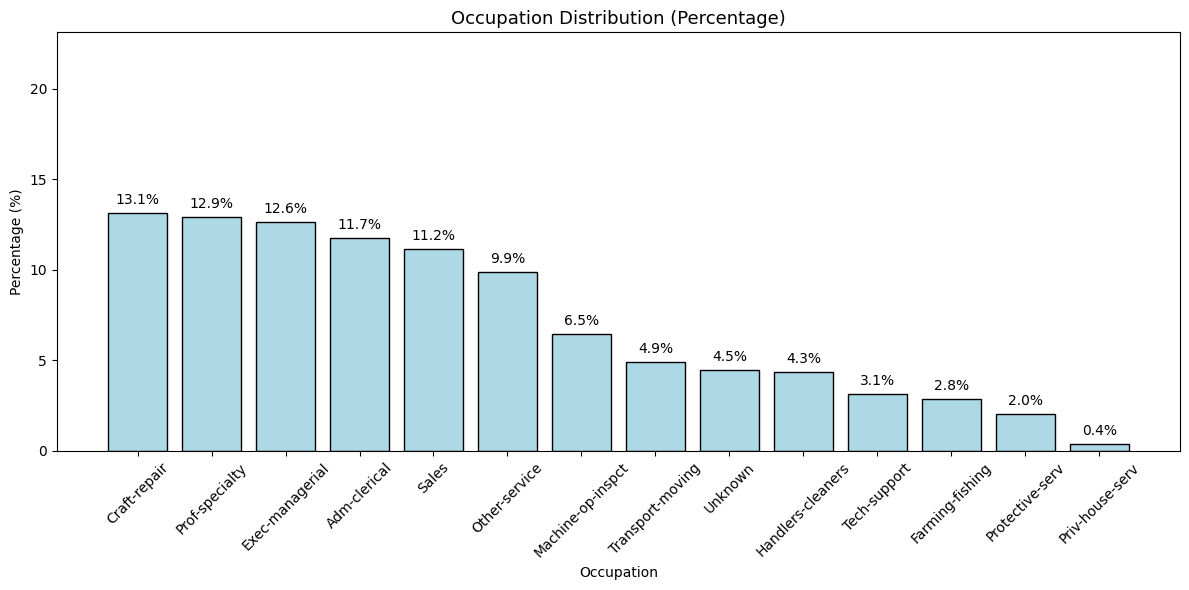

In [112]:
# Calculate percentage distribution
marital_percent = df['occupation'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='lightblue', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Occupation Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Occupation')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

In [113]:
df['occupation'].dtype  # The data type of this column is "object" which now i will convert to "category".

dtype('O')

In [114]:
df['occupation'] = df['occupation'].astype('category')  # Converting the columns data type to "category".

/tmp/ipython-input-114-3462033256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'] = df['occupation'].astype('category')  # Converting the columns data type to "category".


In [115]:
df['occupation'].dtype  # The data type of this column "occupation" is now correct which is "category".

CategoricalDtype(categories=['Adm-clerical', 'Craft-repair', 'Exec-managerial',
                  'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
                  'Other-service', 'Priv-house-serv', 'Prof-specialty',
                  'Protective-serv', 'Sales', 'Tech-support',
                  'Transport-moving', 'Unknown'],
, ordered=False, categories_dtype=object)

### Conclusion: Preprocessing of "Occupation" Column
I have completed preprocessing for the "Occupation" column. I checked all the important things like missing values, unusual data, and how the values are spread using visualizations.

There were two main issues I fixed:

One category was just a "?", which I replaced with "Unknown" to make it meaningful.

I found a very rare category called "Armed-Forces" (only a few rows), so I removed those rows from the dataset to avoid weak or misleading insights.

Now, the "Occupation" column is clean, well-structured, and ready for use in any further analysis or machine learning work.

 ## Data Preprocessing for column "relationship"

In [116]:
df['relationship']

,relationship
0,Own-child
1,Husband
2,Husband
3,Husband
4,Own-child
...,...
48837,Wife
48838,Husband
48839,Unmarried
48840,Own-child


In [117]:
df['relationship'].isna().sum()


np.int64(0)

In [118]:
df['relationship'].value_counts()

,count
relationship,
Husband,17696
Not-in-family,11469
Own-child,7006
Unmarried,4841
Wife,2211
Other-relative,1383


In [119]:
df['relationship'].dtype

dtype('O')

In [120]:
df['relationship'] = df['relationship'].astype('category')  # Converting the columns data type to "category".

/tmp/ipython-input-120-387439598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship'] = df['relationship'].astype('category')  # Converting the columns data type to "category".


In [121]:
df['relationship'].dtype

CategoricalDtype(categories=['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
                  'Unmarried', 'Wife'],
, ordered=False, categories_dtype=object)

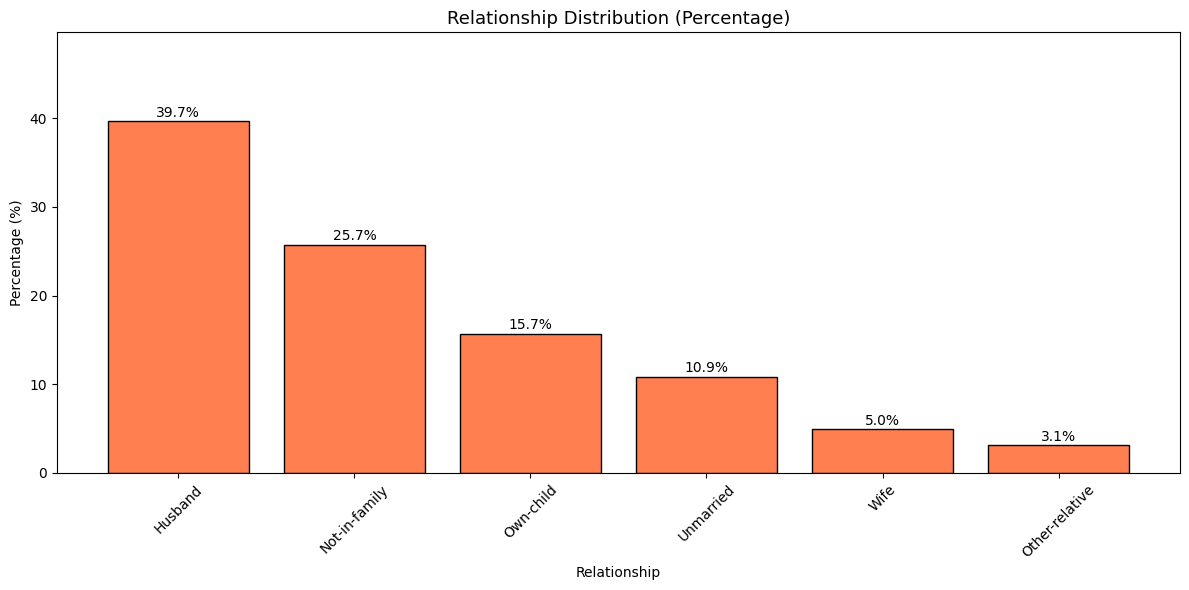

In [122]:
# Calculate percentage distribution
marital_percent = df['relationship'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='coral', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Relationship Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Relationship')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

### Conclusion for Data Preprocessing of column "relationship" :-

I have **preprocessed the data for the column "Relationship"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".


 ## Data Preprocessing for column "race"

In [294]:
df.columns  # This will display all the column names present in the dataframe of "df".

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [295]:
df['race']

,race
0,Black
1,White
2,White
3,Black
4,White
...,...
48837,White
48838,White
48839,White
48840,White


In [124]:
df['race'].isna().sum()

np.int64(0)

In [125]:
df['race'].value_counts()

,count
race,
White,37979
Black,4360
Asian-Pac-Islander,1433
Amer-Indian-Eskimo,448
Other,386


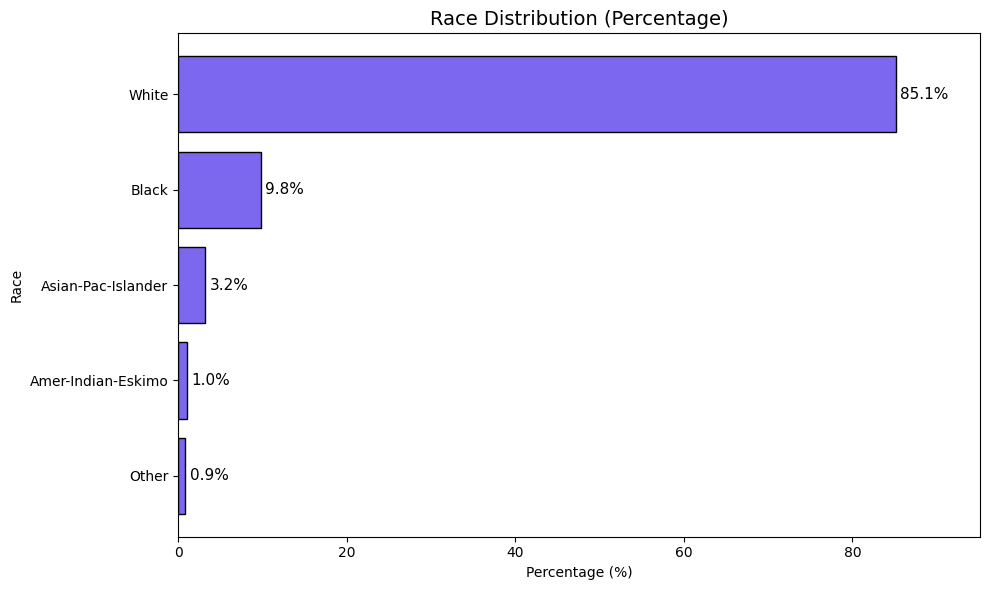

In [126]:
import matplotlib.pyplot as plt

# Calculate percentage distribution
race_percent = df['race'].value_counts(normalize=True) * 100
race_percent = race_percent.sort_values()  # Sort for cleaner visual

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(race_percent.index, race_percent.values, color='mediumslateblue', edgecolor='black')

# Add percentage labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', fontsize=11)

plt.title('Race Distribution (Percentage)', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Race')
plt.xlim(0, max(race_percent.values) + 10)  # Add space for labels
plt.tight_layout()
plt.show()


In [127]:
df['race'].dtype

dtype('O')

In [128]:
df['race'] = df['race'].astype('category')

/tmp/ipython-input-128-1602040796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'] = df['race'].astype('category')


In [129]:
df['race'].dtype

CategoricalDtype(categories=['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
                  'White'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "race" :-

I have **preprocessed the data for the column "Race"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".

## Data Preprocessing for column "gender"

In [130]:
df['gender']

,gender
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
48837,Female
48838,Male
48839,Female
48840,Male


In [131]:
df['gender'].isna().sum()


np.int64(0)

In [132]:
df['gender'].value_counts()

,count
gender,
Male,29863
Female,14743


In [133]:
df['gender'].mode()

,gender
0,Male


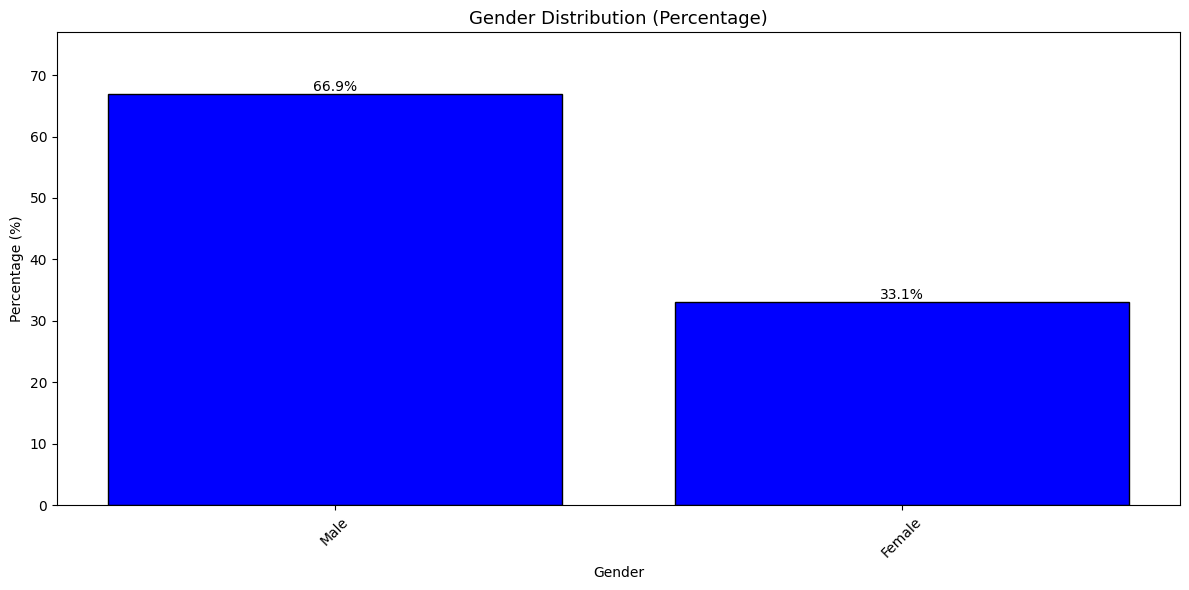

In [136]:
# Calculate percentage distribution
marital_percent = df['gender'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(marital_percent.index, marital_percent.values, color='blue', edgecolor='black')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha='center')

plt.title('Gender Distribution (Percentage)', fontsize=13)
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.ylim(0, max(marital_percent.values) + 10)  # Buffer for label
plt.tight_layout()
plt.show()

In [138]:
df['gender'].dtype # before converting datatype

dtype('O')

In [139]:
df['gender'] = df['gender'].astype('category')

/tmp/ipython-input-139-1556710570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('category')


In [141]:
df['gender'].dtype # after converting dstatype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "gender" :-

I have **preprocessed the data for the column "Gender"**.

There were no problems just this column had **"One Small Inconsistency"** which was incorrect data type "object" which i converted to corect which is "category".



## Data Preprocessing for column "capital-gain"

In [142]:
df['capital-gain'] # Detail about column

,capital-gain
0,0
1,0
2,0
3,7688
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [143]:
df['capital-gain'].dtype

dtype('int64')

In [144]:
# Filtering the dataframe according to wherever the capital gain is 0 and then taking value counts of income
df [ df [ "capital-gain" ] == 0 ] [ "income" ].value_counts ( )

,count
income,
<=50K,32510
>50K,8599


In [148]:
# Filtering the dataframe according to wherever the capital gain is 0 and then calculating percentage for unique categories in income
df [ df [ "capital-gain" ] == 0 ] [ "income" ].value_counts ( normalize = True ) * 100

,proportion
income,
<=50K,79.082439
>50K,20.917561


In [145]:
# Filtering the dataframe according to wherever the capital gain is gretare than 0 and then taking value counts of income
df [ df [ "capital-gain" ] > 0 ] [ "income" ].value_counts ( )

,count
income,
>50K,2231
<=50K,1266


In [146]:

# Filtering the dataframe according to wherever the capital gain is greater than 0 and then calculating percentage for unique categories in income
df [ df [ "capital-gain" ] > 0 ] [ "income" ].value_counts ( normalize = True ) * 100

,proportion
income,
>50K,63.797541
<=50K,36.202459


In [147]:
df.groupby('income')['capital-gain'].mean()  # I did groupby according to column income and then took average of capital gain.

,capital-gain
income,
<=50K,134.684895
>50K,3873.117913


### Understanding the Capital-Gain Column
Capital-gain represents the profit a person earns from selling assets like property, stocks, or investments at a price higher than their purchase price. Unlike regular income such as salary or wages, capital gains are usually occasional or one-time events.

Because of this, most entries in the capital-gain column are zero, with only a few individuals showing non-zero values.

### Initial Assumption and Doubts
At first, I assumed this column might not significantly impact income classification because factors like education, age, and occupation seem more relevant to regular income.

However, after reviewing other similar projects, I found that many treat capital-gain as an important feature, prompting me to investigate further.

Data-Driven Insight
By splitting the dataset into two groups based on capital-gain (zero vs. non-zero), I analyzed the income distribution:

* For capital-gain = 0:

  * ~79% belong to the low-income group (<=50K)

  * ~21% belong to the high-income group (>50K)

* For capital-gain > 0:

  * ~36% belong to the low-income group

 *  ~64% belong to the high-income group (>50K)


This analysis reveals a strong correlation between having capital gains and belonging to the high-income group. Individuals reporting capital gains tend to have significantly higher overall incomes because these gains contribute to their total income.

Therefore, capital-gain is an important predictive feature for income classification and should be retained for preprocessing and modeling.

In [149]:
df [ "capital-gain" ].isna().sum()  # There are no missing data present in this column.

np.int64(0)

In [150]:
df [ "capital-gain" ].shape  #  total :  44606 people in this dataset.

(44606,)

In [151]:
df [ df [ "capital-gain" ] == 0 ].shape [ 0 ]  # There are 41,109 people who have "No Capital Gain".

41109

In [152]:
( df [ df [ "capital-gain" ] == 0 ].shape [ 0 ] /  df [ "capital-gain" ].shape [ 0 ] ) * 100  # 92.16% of people have "No Capital Gain".

92.16024750033628

In [153]:
df [ df [ "capital-gain" ] > 0 ].shape  # There are 3,497 people who have "Capital Gain".

(3497, 13)

In [154]:
( df [ df [ "capital-gain" ] > 0 ].shape [ 0 ] /  df [ "capital-gain" ].shape [ 0 ] ) * 100

7.839752499663723

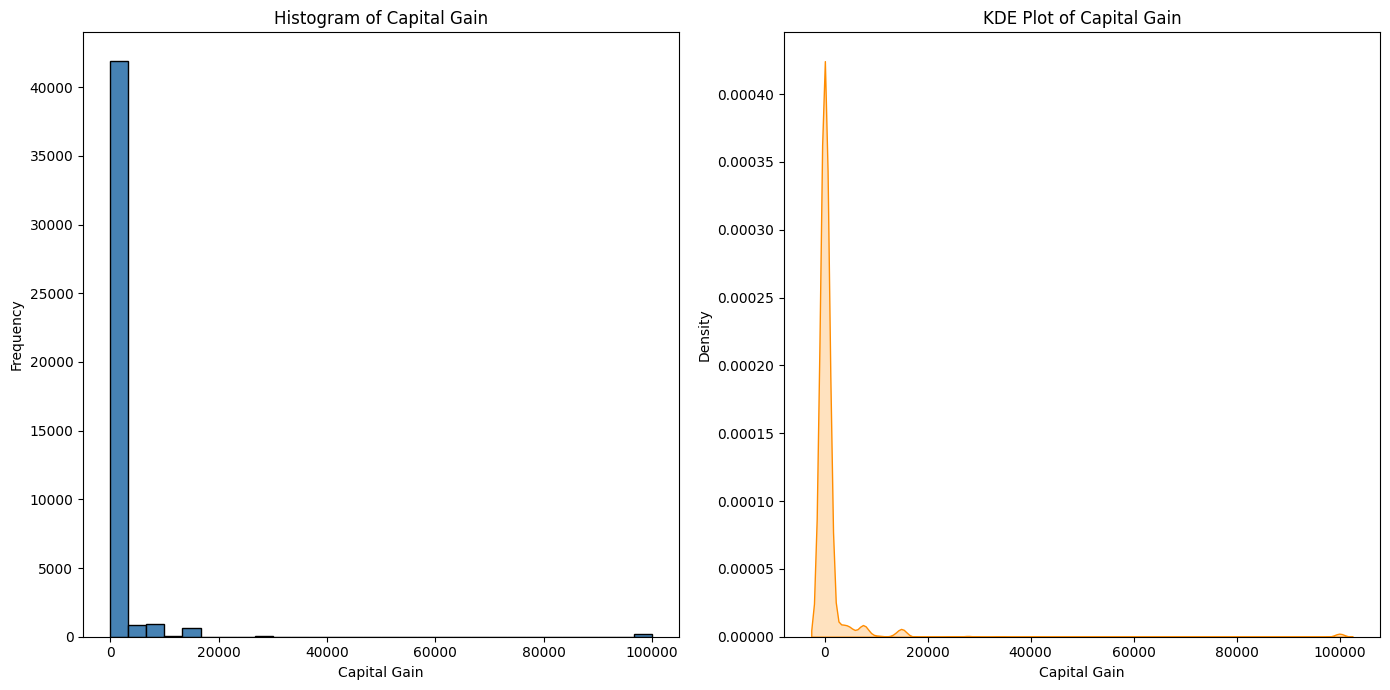

In [157]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(14,7))

# Plot histogram on the first axis
axes[0].hist(df["capital-gain"], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Capital Gain', fontsize=12)
axes[0].set_xlabel('Capital Gain')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='capital-gain', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Capital Gain', fontsize=12)
axes[1].set_xlabel('Capital Gain')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [158]:
df["capital-gain"].skew()

np.float64(12.081305006399914)

From the histogram and KDE plot, I can see that the capital-gain data is heavily skewed to the right (positively skewed). This means:

* Most people have a capital gain of 0.

* A smaller number have capital gains greater than zero.

* Only a few people have very high capital gains.

These few very high values stretch the data and cause it to look distorted.

However, these high values are not errors or mistakes; they are real and valid because capital gains can sometimes be very large. So, I will keep these extreme values and not remove them as outliers since they represent genuine data points.

In [159]:
df["capital-gain"].describe()  # This will provide me Rich Statistical Insights for the column "capital-gain".


,capital-gain
count,44606.000000
mean,1042.348204
std,7381.120355
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


### Interpretation :-

The insights which i got from above two visualizations were 100% correct i can say this by looking at the above results of "Statistical Summary" :-

- I can clearly see that there are **Outliers** because i can see that there is a **Huge difference in the value of Mean ( 1042 ) and Median ( 0 ).**

- The **Standard Deviation is High** suggesting me that the data is very spread out which actually is as i noticed it in "KDE Plot".

- The **Dominance of 0 ( Mode )** in Quartile 1 , Quartile 2 as well as Quartile 3 i can see all the three quartiles have value 0 it tells me that **75% of the people have No - Zero Capital Gain**.

- Lastly the **"Statistical Outlier" is 99999**.

I will investigate this outlier now through filtering the data and make sure that is it even a "Real Outlier" or not ?

In [160]:
df[df["capital-gain"] == 99999] #Filtered the dataframe according to wherever the column "capital-gain" is equal to 99999.

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,Graduate,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,22,Self-emp-not-inc,Graduate,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
48109,47,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48519,47,Private,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


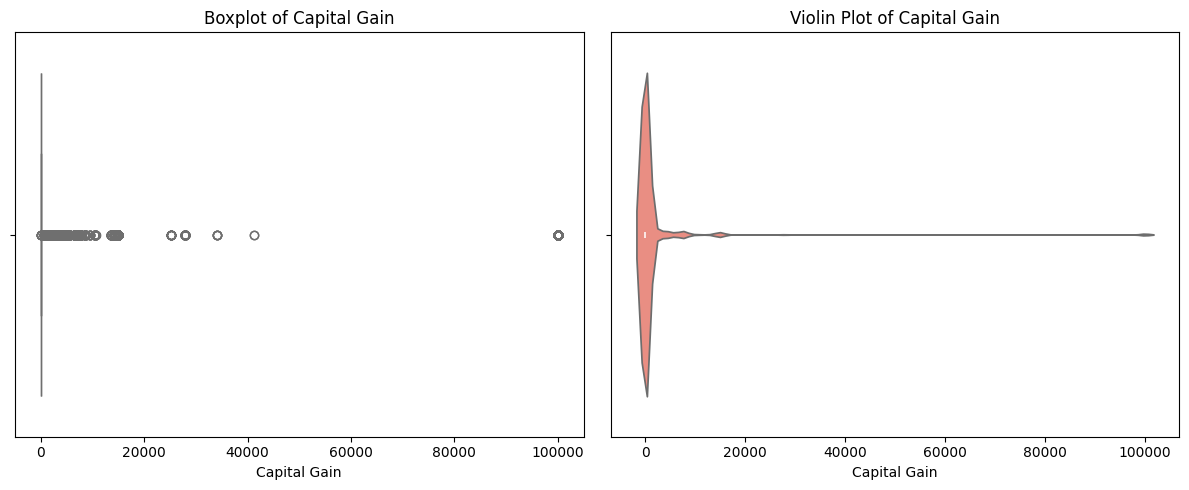

In [161]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['capital-gain'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Capital Gain', fontsize=12)
axes[0].set_xlabel('Capital Gain')

# Violin Plot
sns.violinplot(x=df['capital-gain'], ax=axes[1], inner='box', color='salmon')
axes[1].set_title('Violin Plot of Capital Gain', fontsize=12)
axes[1].set_xlabel('Capital Gain')

# Layout
plt.tight_layout()
plt.show()

The Boxplot and Violin Plot for the capital-gain column are both influenced by statistical outliers — those few extreme high values in the data.

However, I’ve already gained a clear understanding of how the data is distributed by looking at the Histogram and KDE Plot earlier. These two visualizations showed that most people have a capital gain of 0, and only a few have higher values, with some having very high gains.

### Conclusion for Data Preprocessing of column "capital-gain" :-

With this i have **preprocessed the data for the column "capital-gain"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"Discoverd that it affects thec target column of "income" and it had outliers but they were Statistical Outliers and Not Actual Outliers"**.


## Data Preprocessing for column "capital-loss"

In [164]:
df['capital-loss']

,capital-loss
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [165]:
df['capital-loss'].dtype # check datatype

dtype('int64')

In [166]:
df[df['capital-loss'] > 0].shape [0] #instances where capital loss is greter than 0

2079

So i can see that there are 2079 instances where capital loss is greter than 0.

So , what my understanding tells me that if a person had "capital-loss > 0 then they should have a "profit-gain == 0" so if these both number of instances ( rows match ) it means that the data present in both the column is correct and now i will check this only by filtering data.

In [167]:
# Filtering data according to wherever 'capital-loss' > 0 and 'profit-gain' == 0
df[( df['capital-loss'] > 0 ) & ( df['capital-gain'] == 0 ) ].shape [0]

2079

The results are 2079 only "it is Matching" so , with this "I have "Validated" that the data present in both the column 'capital-loss' and 'capital-gain' is totally correct and i can use them for further processes".

In [168]:
df['capital-loss'].isna().sum()

np.int64(0)

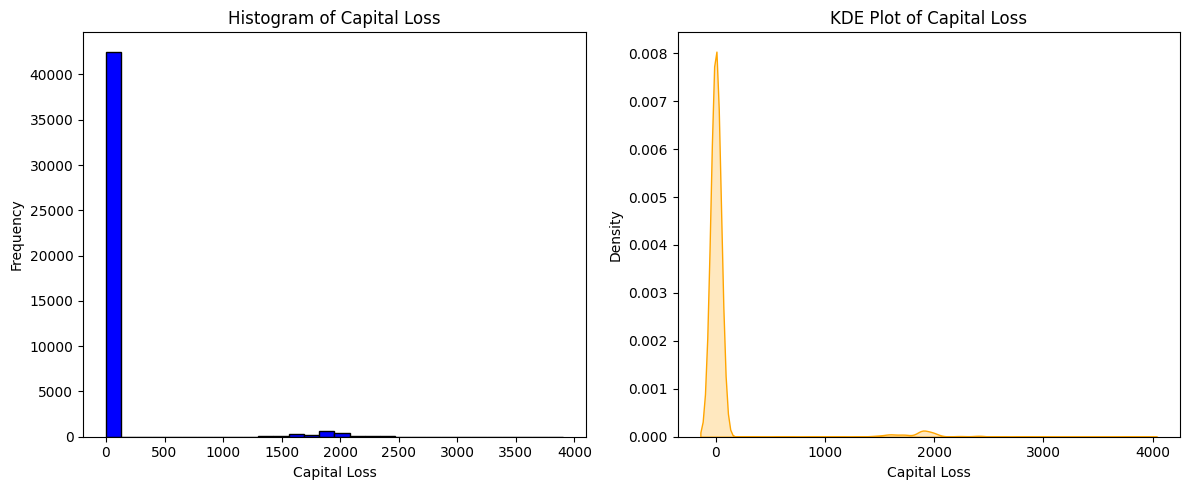

In [170]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df["capital-loss"], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Capital Loss', fontsize=12)
axes[0].set_xlabel('Capital Loss')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='capital-loss', fill= True, color='orange', ax=axes[1])
axes[1].set_title('KDE Plot of Capital Loss', fontsize=12)
axes[1].set_xlabel('Capital Loss')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [171]:
df["capital-loss"].skew()## The skenwess value for "capital-loss"

np.float64(4.534189061445579)

Just like I saw with the capital-gain column, the capital-loss column shows a similar pattern.

From the Histogram and KDE Plot, I can clearly see that the data is highly positively skewed — meaning:

* Most people have a capital loss of 0, which also makes 0 the mode (most frequent value).

* Only a small number of people have higher capital-loss values.

* These few high values stretch the graph and cause the distortion.

Although the values appear positive, they actually represent a loss (not a gain), so they should be understood as negative in nature.

Just like before, I can say that the extreme values (very high losses) are statistical outliers — they stand out in the chart — but they are not real errors or invalid data. In real life, it's very possible for someone to face large financial losses.

In [172]:
df["capital-loss"].describe() #"Statistical Summary" for the "capital-loss" data.

,capital-loss
count,44606.000000
mean,86.707707
std,399.067933
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3900.000000


### Interpretation:

The insights I got from the Histogram and KDE Plot were completely correct, and now the Statistical Summary confirms it:

* There’s a big gap between the Mean (86.70) and the Median (0.0), which clearly shows the data is skewed — a small number of people have very high capital loss, pulling the mean up.

* The Standard Deviation is high (399.06), meaning the data is widely spread out. This matches what I saw earlier in the KDE plot — most values are low, but a few are much higher.

* The first three quartiles (Q1, Q2, Q3) are all 0, which tells me that 75% of people have no capital loss. This confirms the dominance of 0 in the data.

* I noticed that the maximum value is 3900, which stands out as a statistical outlier.

Even though I’m confident that this high value is not a real-world outlier (since large losses can happen), I’ll still filter the data and inspect it just to be 100% sure. It’s always good to validate outliers before deciding to keep or remove them.

In [173]:
df["capital-loss"].shape[0]

44606

In [174]:
( df[df["capital-loss"] == 0 ].shape[0] / df["capital-loss"].shape[0] ) * 100

95.33919203694569

In [175]:
( df[df["capital-loss"] > 0 ].shape[0] / df["capital-loss"].shape[0] ) * 100

4.660807963054298

Out of 100% , **95.33%** of the people have "No Zero Capital Loss".

Out of 100% , **4.66%** of the people have "A Capital Loss of greater than 0".


In [176]:
# Filtering the dataframe according to wherever the "capital-loss" is 3900 exactly
df[df['capital-loss'] == 3900 ]


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
36697,54,Private,Elementary,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
40083,41,Private,Graduate,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


After filtering the data and checking the rows where capital-loss = 3900, I can confidently say that this is just a statistical outlier and not a real outlier — just as I expected earlier.

Here’s why:

Income makes sense – In both rows where capital-loss is 3900, the income is <= 50K, which is logical. People who suffered such a big loss are less likely to be in the high-income group.

Capital-gain is 0 – This also makes sense. It’s unlikely that someone has both a gain and a loss at the same time in the dataset, and the data supports that.

Data consistency – All other values across these rows seem normal and different from each other, which means there are no data entry errors or duplications


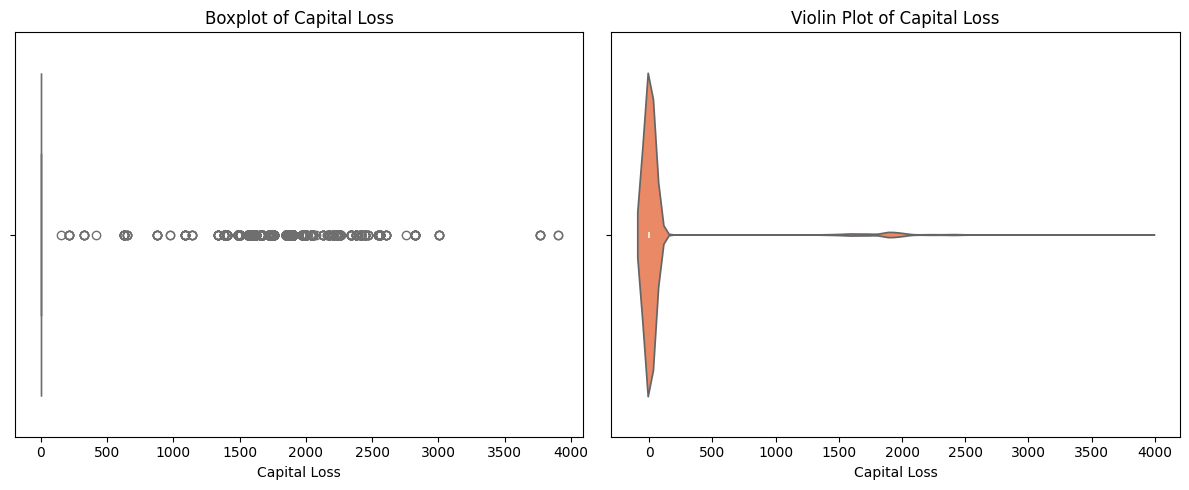

In [178]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['capital-loss'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Capital Loss', fontsize=12)
axes[0].set_xlabel('Capital Loss')

# Violin Plot
sns.violinplot(x=df['capital-loss'], ax=axes[1], inner='box', color='coral')
axes[1].set_title('Violin Plot of Capital Loss', fontsize=12)
axes[1].set_xlabel('Capital Loss')

# Layout
plt.tight_layout()
plt.show()

---> The "Boxplot" and the "Violin Plot" both are affected because of the "Statistical Outlier" but i have already got a very good understanding and insights about the distribution of the data for the column "capital-loss" from the previous two visualizations which were "Histogram" and "KDE Plot" and also have already "Validated" the outlier data these above two visualizations was just plotted to make my understanding more accurate.

### Conclusion for Data Preprocessing of column "capital-loss" :-

With this i have **preprocessed the data for the column "capital-loss"** went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"Discoverd that even this column affects the target column of "income" and it had outliers but they were Statistical Outliers and Not Actual Outliers"**.

## Data Preprocessing for column "hours-per-week"

In [179]:
df['hours-per-week'] # deatil of this column

,hours-per-week
0,40
1,50
2,40
3,40
4,30
...,...
48837,38
48838,40
48839,40
48840,20


In [180]:
df['hours-per-week'].dtype # check datatype

dtype('int64')

In [181]:
df['hours-per-week'].isna().sum() # check whether it contain missing value or null value

np.int64(0)

In [182]:
df['hours-per-week'].nunique() # Number of unique categories

94

In [183]:
df['hours-per-week'].unique() # display 94 categories

array([40, 50, 30, 10, 39, 35, 48, 25, 20, 45, 47, 43, 90, 54, 60, 38, 32,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21,  5, 46,  3, 49,
       67, 76, 23,  2, 58, 34,  4, 51, 78, 63,  6, 92, 31,  7, 77, 27, 29,
       85,  1, 13, 26, 19, 98, 62, 66, 57, 11, 59,  9, 64, 73, 61, 88, 89,
       74, 86, 69, 87, 97, 94, 81, 91, 95])

In [185]:
df['hours-per-week'].describe() # statistical Insight

,hours-per-week
count,44606.000000
mean,41.267722
std,11.688306
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


### Interpretation:
 Based on the statistical summary, I can say that there are no major outliers in the data overall. Here’s why:

* The Mean is 41.26 and the Median is 40.0, which are very close. This means the data is fairly symmetrical.

* The Standard Deviation is moderate, so the values are not too widely spread.

* Most of the data falls in the 40s range, and the first three quartiles (Q1, Q2, Q3) are all in the 40s. This shows that about 75% of people work around 45 hours per week.

## Suspicious Value (99):
However, I noticed that the maximum value is 99, which looks very unrealistic. Working 99 hours a week is extremely uncommon and goes beyond legal or practical work limits in most countries.

So, even though the data overall looks fine, this value might be an outlier.

To be 100% sure, I will filter and inspect the rows where hours-per-week = 99, and check if it’s a valid real-world case or an error.

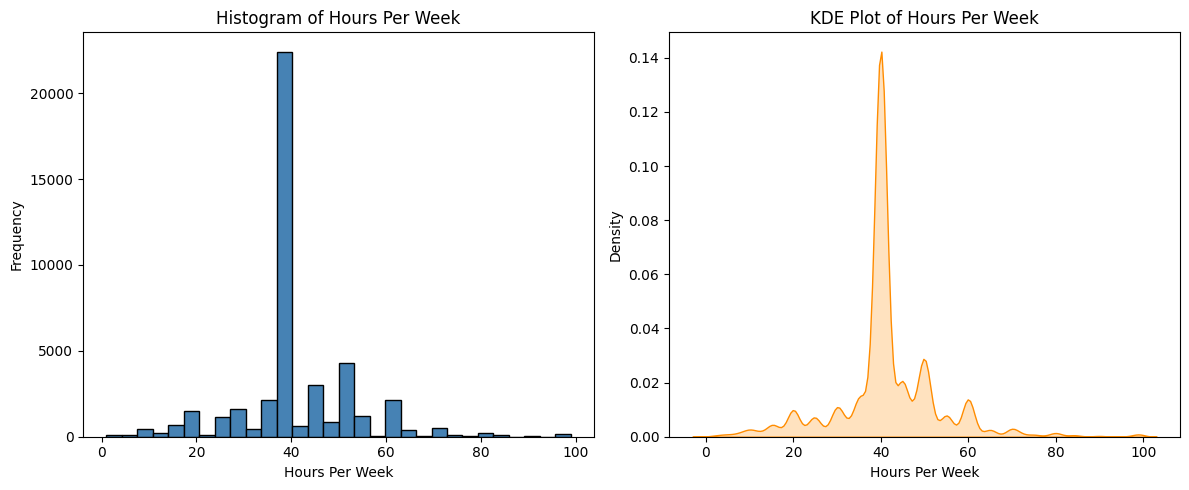

In [186]:
# Create figure with 2 side-by-side plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Plot histogram on the first axis
axes[0].hist(df['hours-per-week'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histogram of Hours Per Week', fontsize=12)
axes[0].set_xlabel('Hours Per Week')
axes[0].set_ylabel('Frequency')

# Plot KDE on the second axis
sns.kdeplot(data=df, x='hours-per-week', fill= True, color='darkorange', ax=axes[1])
axes[1].set_title('KDE Plot of Hours Per Week', fontsize=12)
axes[1].set_xlabel('Hours Per Week')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [187]:
df['hours-per-week'].skew() # check Skewness : 0.43

np.float64(0.4383766055796753)

In [188]:
df['occupation'].value_counts() # frequency of each category in the column

,count
occupation,
Craft-repair,5845
Prof-specialty,5758
Exec-managerial,5638
Adm-clerical,5234
Sales,4974
Other-service,4408
Machine-op-inspct,2885
Transport-moving,2187
Unknown,1997


In [189]:
# Filtering the dataframe  :""hours-per-week" is greater than or equal to 90 with their occupation
df[df['hours-per-week'] >= 90 ] ['occupation'].value_counts()

,count
occupation,
Farming-fishing,34
Prof-specialty,32
Exec-managerial,27
Transport-moving,24
Sales,16
Craft-repair,15
Other-service,14
Unknown,11
Protective-serv,9


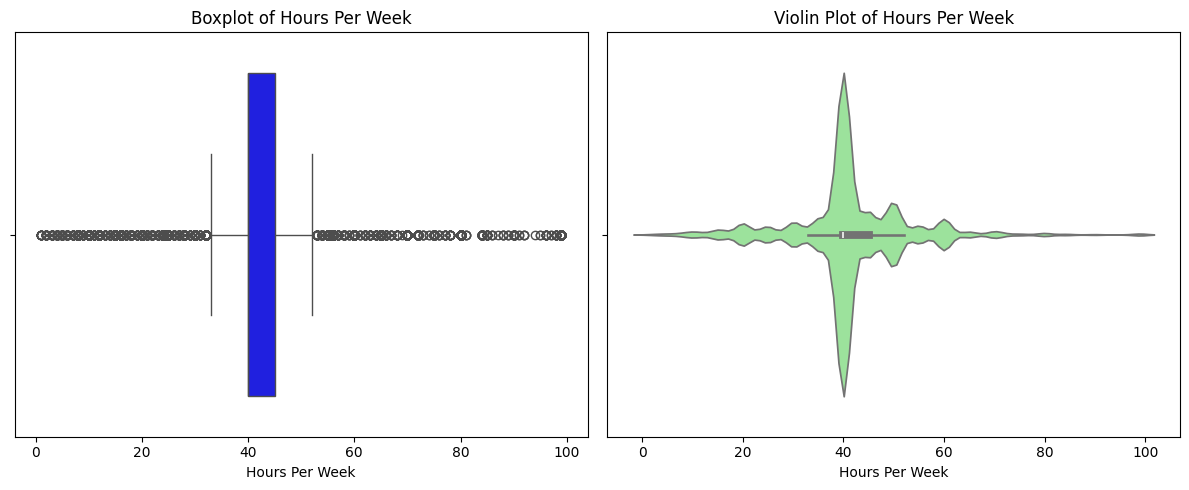

In [192]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot
sns.boxplot(x=df['hours-per-week'], ax=axes[0], color='blue')
axes[0].set_title('Boxplot of Hours Per Week', fontsize=12)
axes[0].set_xlabel('Hours Per Week')

# Violin Plot
sns.violinplot(x=df['hours-per-week'], ax=axes[1], inner='box', color='lightgreen')
axes[1].set_title('Violin Plot of Hours Per Week', fontsize=12)
axes[1].set_xlabel('Hours Per Week')

# Layout
plt.tight_layout()
plt.show()

### Interpretation:
The Boxplot and Violin Plot both clearly show that most data points are concentrated around 40 hours per week, which makes perfect sense because in most countries, 40 hours is considered the standard work week.

As the value moves away from 40 — either lower or higher — the number of people working those hours decreases. This matches what I saw earlier in the Histogram and KDE Plot.

By using those earlier visualizations, I already gained a good understanding of the data distribution. I also validated the outlier (99 hours) separately to make sure it was not an error.

These box and violin plots were created to confirm and strengthen my earlier insights, and they did just that — helping me visualize the spread, concentration, and possible outliers more clearly.

### Conclusion for Data Preprocessing of column "hours-per-week" :-
With this i have preprocessed the data for the column "hours-per-week" went through all the essential things like missing data , outliers , data distribution etc.. also through visualizations i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i "Validated that "High Hours Per Week" though seemes initially suspicious to me i validated that they are correct by comparing them with the data of the column "occupation".

In [193]:
df['native-country']

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,United-States
...,...
48837,United-States
48838,United-States
48839,United-States
48840,United-States


In [194]:
df['native-country'].isna().sum()

np.int64(0)

In [195]:
df['native-country'].nunique()

42

In [197]:
df['native-country'].value_counts()

,count
native-country,
United-States,39925
Mexico,922
?,796
Philippines,270
Germany,190
Puerto-Rico,171
Canada,151
El-Salvador,149
India,146


Interpretation of Inconsistencies in Native Country:
While exploring the native-country column, I found two main issues:


* "?" as a Country Name

 * There are 796 records where the country is marked as "?".

  *  Even though it's not a valid country name, I won’t delete these rows because they make up a large portion of the data (3rd highest).

  * Removing them could introduce bias in the model.

 *  So instead, I will replace "?" with "Other", which will represent unknown or less common countries.

* "Holand-Netherlands" Appears Only Once

  * This country appears just 1 time in the entire dataset.

 * Such rare values can confuse machine learning models and make it harder to learn meaningful patterns.

So I will remove this one row to keep the data cleaner and more consistent.

In [198]:
df['native-country'] = df['native-country'].replace("?", "Other")  # Replacing the "?' with "Other".

In [199]:
df[df['native-country'] == "?" ]

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [200]:
df['native-country'].value_counts()

,count
native-country,
United-States,39925
Mexico,922
Other,796
Philippines,270
Germany,190
Puerto-Rico,171
Canada,151
El-Salvador,149
India,146


In [204]:
df = df[df['native-country'] != "Holand-Netherlands" ]  # Removing the row where the country is "Holand-Netherlands".

In [205]:
df['native-country'].dtype

dtype('O')

In [206]:
df['native-country'] = df['native-country'].astype('category')

In [207]:
df['native-country'].dtype

CategoricalDtype(categories=['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
                  'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
                  'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
                  'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland',
                  'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
                  'Other', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
                  'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
                  'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States',
                  'Vietnam', 'Yugoslavia'],
, ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of column "native-country

I have **preprocessed the data for the column "hours-per-week"** went through all the essential things like missing data , outliers , data distribution etc.. also through frequency distribution i observed the datas characteristics , distribution and patterns.

Most Importantly for this column i  **"I found "Three Inconsistencies" which were *?* other was *Holand-Netherlands* , lastl was *Incorrect data Type* , i corrected all of these Inconsistencies"**.


## Data Preprocessing for column "income":-

In [208]:
df['income']


,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [209]:
df['income'].nunique()


2

In [211]:
df['income'].value_counts()

,count
income,
<=50K,33775
>50K,10830


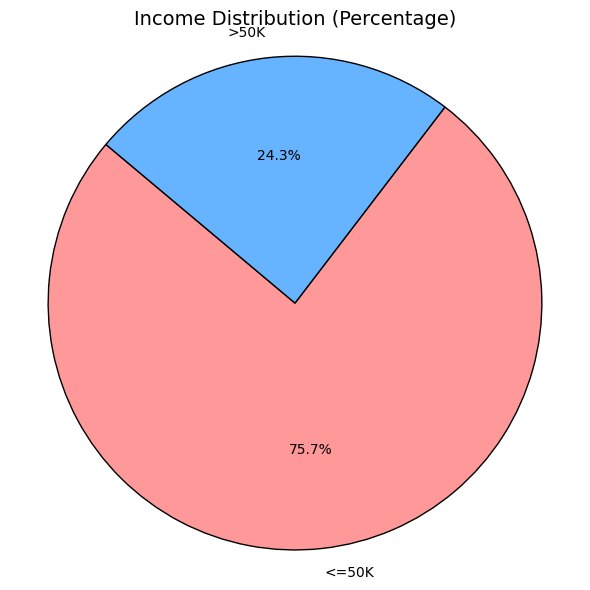

In [214]:
# Calculate percentage distribution
income_percent = df['income'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(
    income_percent.values,
    labels=income_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FF9999', '#66B3FF'],  # Optional: custom colors
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Income Distribution (Percentage)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


In [215]:
df['income'].dtype

dtype('O')

In [216]:
df['income'] = df['income'].astype('category')

In [217]:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=False, categories_dtype=object)

### Conclusion for Data Preprocessing of Target Column "income" :-

I have **preprocessed the data for the column "income"** went through all the essential things like missing data , outliers , data distribution etc.. also through frequency distribution i observed the datas characteristics , distribution and patterns.

Most Importantly this column is **The Target ( Y ) Column it contains the data which i want to predict this just had small data inconsistency which i corrected**.

In [218]:
# after removing inconsistency in dataset now it look like
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,HighSchool,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,Graduate,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Associate,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Graduate,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,Graduate,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Associate,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,Graduate,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,Graduate,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,Graduate,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  category
 2   education       44605 non-null  category
 3   marital-status  44605 non-null  category
 4   occupation      44605 non-null  category
 5   relationship    44605 non-null  category
 6   race            44605 non-null  category
 7   gender          44605 non-null  category
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  category
 12  income          44605 non-null  category
dtypes: category(9), int64(4)
memory usage: 2.1 MB


In [221]:
df.describe() # "Statistical Summary" for only "Numeric Columns".

,age,capital-gain,capital-loss,hours-per-week
count,44605.000000,44605.000000,44605.000000,44605.000000
mean,36.624638,1042.371573,86.660217,41.267750
std,11.227463,7381.201445,398.946342,11.688435
min,18.000000,0.000000,0.000000,1.000000
25%,27.000000,0.000000,0.000000,40.000000
50%,36.000000,0.000000,0.000000,40.000000
75%,45.000000,0.000000,0.000000,45.000000
max,60.000000,99999.000000,3900.000000,99.000000


In [222]:
df.describe(include='category')  # "Statistical Summary" for only "Catgeorical Columns".

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,44605,44605,44605,44605,44605,44605,44605,44605,44605
unique,7,8,7,14,6,5,2,41,2
top,Private,Graduate,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,31764,24843,20229,5845,17696,37978,29863,39925,33775


## FINAL CONCLUSION  :-
I have successfully completed Step 4: Exploratory Data Analysis (EDA). In this step, I analyzed each column individually and performed necessary data preprocessing. Now, the dataset is clean, with no missing values or outliers, and it's ready to be used for the next steps.

---
---
---

 # 5. Data Encoding ( Converting Data To Numbers )

Now that my data is fully cleaned and preprocessed, the next step is to convert it into numbers. This is important because machine learning models can only understand numerical data. If there are any text or category-type columns, the model won’t be able to understand or learn from them.

So, I will now change the values in all the categorical columns into numbers. The columns that already have numbers will remain the same since they are already in the right format.

In [223]:
df.info() # Before Encoding dataframe look like

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  category
 2   education       44605 non-null  category
 3   marital-status  44605 non-null  category
 4   occupation      44605 non-null  category
 5   relationship    44605 non-null  category
 6   race            44605 non-null  category
 7   gender          44605 non-null  category
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  category
 12  income          44605 non-null  category
dtypes: category(9), int64(4)
memory usage: 2.1 MB


In [263]:
# Step: Label Encoding for all object/category columns except the target column

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Dictionary to store encoders (optional, useful for decoding later)
label_encoders = {}

# Loop through all object or category type columns
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    if col != 'income':  # Skip the target column
        print(f"Encoding column: {col}")
        le = LabelEncoder()  # Create a new LabelEncoder for each column
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le  # Store encoder if needed later

print(" All categorical columns (except target) have been label encoded.")
# Preview the updated DataFrame
print(df_encoded)


Encoding column: workclass
Encoding column: education
Encoding column: marital-status
Encoding column: occupation
Encoding column: relationship
Encoding column: race
Encoding column: gender
Encoding column: native-country
 All categorical columns (except target) have been label encoded.
       age  workclass  education  marital-status  occupation  relationship  \
0       25          3          5               4           5             3   
1       38          3          4               2           3             0   
2       28          1          0               2           9             0   
3       44          3          4               2           5             0   
4       18          2          4               4          13             3   
...    ...        ...        ...             ...         ...           ...   
48837   27          3          0               2          11             5   
48838   40          3          4               2           5             0   
48839   58

In [264]:
# Convert all object or category columns to numerical labels
# EXCEPT the target column 'income'
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    if col != 'income':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes.astype('int')

# Explicitly encode the target column 'income':
# - '<=50K' is mapped to 0 (negative class)
# - '>50K' is mapped to 1 (positive class)
df_encoded['income'] = df_encoded['income'].map({'<=50K': 0, '>50K': 1})

# Adding a comment in code or print confirmation
print("'income' column encoded: '<=50K' → 0, '>50K' → 1")

'income' column encoded: '<=50K' → 0, '>50K' → 1


In [265]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44605 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44605 non-null  int64   
 1   workclass       44605 non-null  int64   
 2   education       44605 non-null  int64   
 3   marital-status  44605 non-null  int64   
 4   occupation      44605 non-null  int64   
 5   relationship    44605 non-null  int64   
 6   race            44605 non-null  int64   
 7   gender          44605 non-null  int64   
 8   capital-gain    44605 non-null  int64   
 9   capital-loss    44605 non-null  int64   
 10  hours-per-week  44605 non-null  int64   
 11  native-country  44605 non-null  int64   
 12  income          44605 non-null  category
dtypes: category(1), int64(12)
memory usage: 4.5 MB


### Final conclusion of Encoding :-

 I have "Encoded the data including all the Category Columns" now all the columns are numerical so the "Machine Learning Model" will easily able to work with it , process it and understand patterns from it and this was only my motive . just I have not encode the data for the Target Column which is "income" because for interpretation but with this the step 5 is finished I have encoded all the categories.

 ---
 ---

 ---
 # 6. Feature Scaling


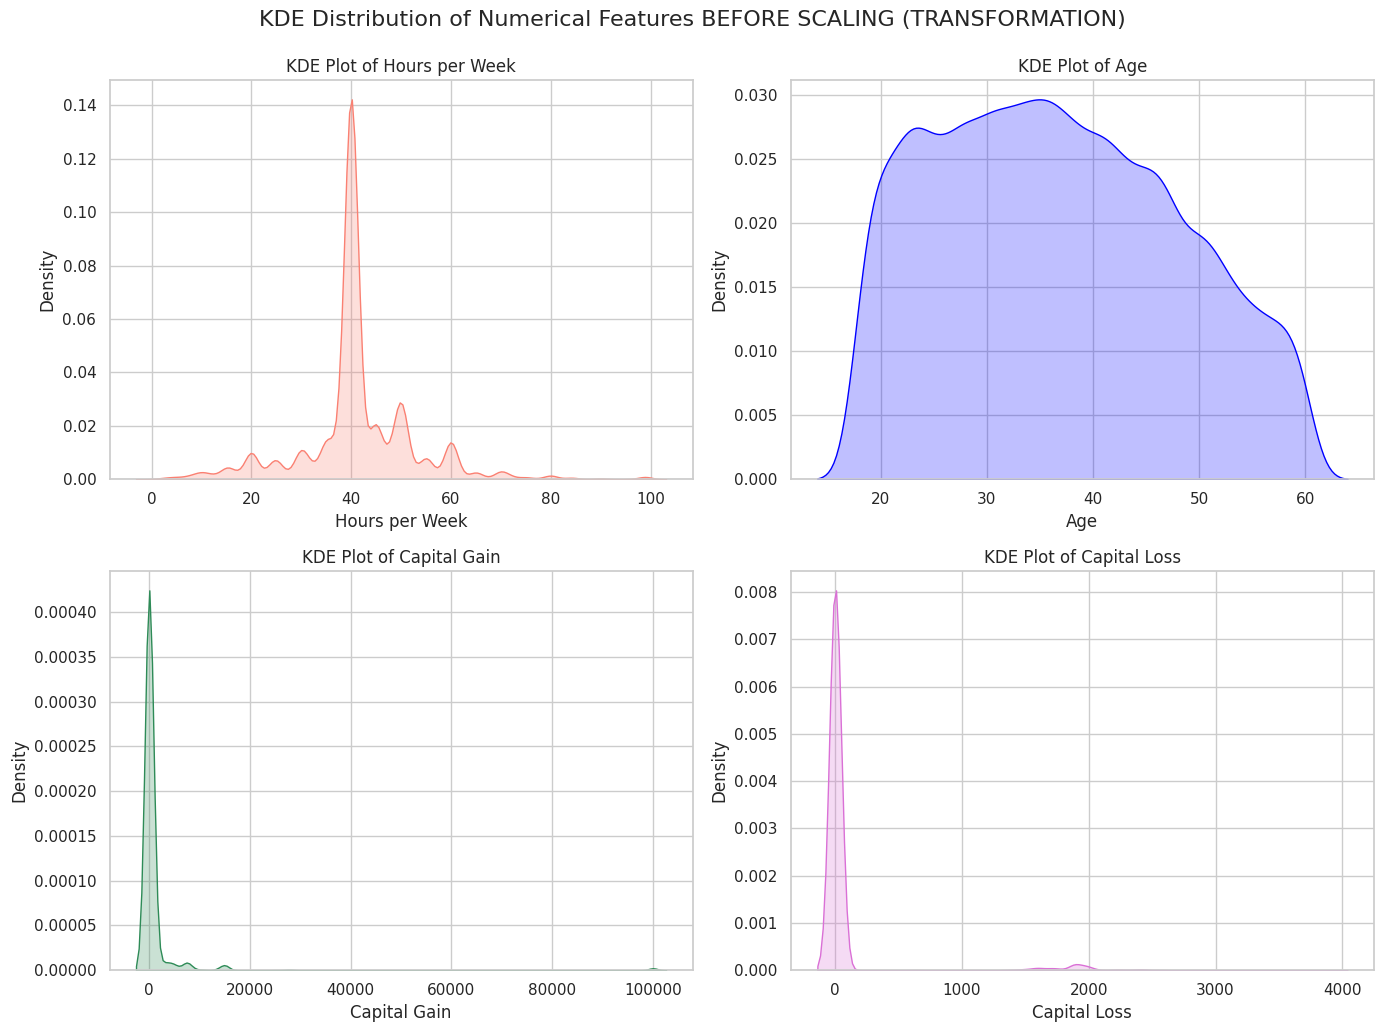

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# KDE plot for 'hours-per-week'
sns.kdeplot(data=df_encoded, x="hours-per-week", ax=axes[0, 0], color='salmon', fill=True)
axes[0, 0].set_title("KDE Plot of Hours per Week", fontsize=12)
axes[0, 0].set_xlabel("Hours per Week")

# KDE plot for 'age'
sns.kdeplot(data=df_encoded, x="age", ax=axes[0, 1], color='blue', fill=True)
axes[0, 1].set_title("KDE Plot of Age", fontsize=12)
axes[0, 1].set_xlabel("Age")

# KDE plot for 'capital-gain'
sns.kdeplot(data=df_encoded, x="capital-gain", ax=axes[1, 0], color='seagreen', fill=True)
axes[1, 0].set_title("KDE Plot of Capital Gain", fontsize=12)
axes[1, 0].set_xlabel("Capital Gain")

# KDE plot for 'capital-loss'
sns.kdeplot(data=df_encoded, x="capital-loss", ax=axes[1, 1], color='orchid', fill=True)
axes[1, 1].set_title("KDE Plot of Capital Loss", fontsize=12)
axes[1, 1].set_xlabel("Capital Loss")

# Improve layout
plt.tight_layout()
plt.suptitle("KDE Distribution of Numerical Features BEFORE SCALING (TRANSFORMATION)", fontsize=16, y=1.03)
plt.show()



### 🔧 Feature Scaling Strategy for Numerical Columns :-

As part of the preprocessing phase for this machine learning project, I carefully analyzed the nature and distribution of the numerical features in the dataset. After thorough consideration, I decided to scale **only four numerical columns**, based on their relevance and impact on the model.


### **Why Only These Four Columns?**

Out of all the numerical columns present, the following four were selected for scaling:

- `age`
- `hours-per-week`
- `capital-gain`
- `capital-loss`

Because:

-- They are continuous numeric values
→ These columns contain actual numbers with a wide range, not categories or labels.

-- They are not categorical
→ Columns like education, income, or occupation are labels or categories, even if they are stored as numbers. Scaling them doesn’t make sense.

-- Scaling improves model performance
→ Especially for:

Distance-based models (like KNN, SVM)

Gradient-based models (like Logistic Regression, Neural Networks)
These models are sensitive to large value differences — unscaled features can dominate others unfairly.

 ### Scaling For Numeric column

 1. hours-per-week → StandardScaler

* Reason:

  * The distribution is centered around a peak (~40 hours) with symmetric spread and moderate range.

  * Not heavily skewed or containing large outliers.

Justification:

    Since it’s mostly symmetric and clustered around a mean, StandardScaler will normalize the feature effectively by centering and scaling it.

🔹 2. age → StandardScaler

 * Reason:

   * The distribution is fairly uniform and mildly right-tailed, but not extremely skewed.

  * No extreme outliers.

Justification:

        StandardScaler works well here as the data is not highly skewed. It maintains the original spread and scale pattern while centering around the mean.

🔹 3. capital-gain → Log1p + MinMaxScaler

 * Reason:

  * Highly right-skewed, with the majority values near 0 and few extreme outliers (up to ~100,000).

Justification:

    Applying np.log1p() reduces skew and brings extreme values closer to the median. Then, MinMaxScaler compresses the range to [0, 1] for uniform scale.

🔹 4. capital-loss → Log1p + MinMaxScaler
  * Reason:

   * Also right-skewed with a strong peak at 0 and some sparse values up to ~4000.

Justification:

    Like capital gain, capital-loss has skewed distribution. log1p() makes it more normal-like, and MinMaxScaler makes it range-bounded for better model performance.

In [267]:
df_encoded # before scaling

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,5,4,5,3,2,1,0,0,40,38,0
1,38,3,4,2,3,0,4,1,0,0,50,38,0
2,28,1,0,2,9,0,4,1,0,0,40,38,1
3,44,3,4,2,5,0,2,1,7688,0,40,38,1
4,18,2,4,4,13,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0,2,11,5,4,0,0,0,38,38,0
48838,40,3,4,2,5,0,4,1,0,0,40,38,1
48839,58,3,4,6,0,4,4,0,0,0,40,38,0
48840,22,3,4,4,0,3,4,1,0,0,20,38,0


In [268]:
df_encoded[['age', 'hours-per-week', 'capital-gain', 'capital-loss' ]]  # "Before Scaling".

,age,hours-per-week,capital-gain,capital-loss
0,25,40,0,0
1,38,50,0,0
2,28,40,0,0
3,44,40,7688,0
4,18,30,0,0
...,...,...,...,...
48837,27,38,0,0
48838,40,40,0,0
48839,58,40,0,0
48840,22,20,0,0


In [269]:
# Importing Data- preprocessing (scaling) library from scikit-learn

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# These are continuous and important for model accuracy
standard_columns = ['age', 'hours-per-week']
log_minmax_columns = ['capital-gain', 'capital-loss']

# --- Step 1: Use StandardScaler for normally distributed data ---
# This will center the values around 0 and scale them to unit variance
scaler = StandardScaler()
df_encoded[standard_columns] = scaler.fit_transform(df_encoded[standard_columns])

# --- Step 2: Apply log1p + MinMaxScaler for skewed data ---
# First apply log1p to reduce skewness and handle large outliers
for column in log_minmax_columns:
    df_encoded[column] = np.log1p(df_encoded[column])

# Then scale the transformed values to a 0–1 range
minmax = MinMaxScaler()
df_encoded[log_minmax_columns] = minmax.fit_transform(df_encoded[log_minmax_columns])


In [270]:
df_encoded[['age', 'hours-per-week', 'capital-gain', 'capital-loss' ]]

,age,hours-per-week,capital-gain,capital-loss
0,-1.035387,-0.108463,0.000000,0.0
1,0.122501,0.747093,0.000000,0.0
2,-0.768182,-0.108463,0.000000,0.0
3,0.656911,-0.108463,0.777174,0.0
4,-1.658865,-0.964019,0.000000,0.0
...,...,...,...,...
48837,-0.857250,-0.279574,0.000000,0.0
48838,0.300638,-0.108463,0.000000,0.0
48839,1.903867,-0.108463,0.000000,0.0
48840,-1.302592,-1.819575,0.000000,0.0


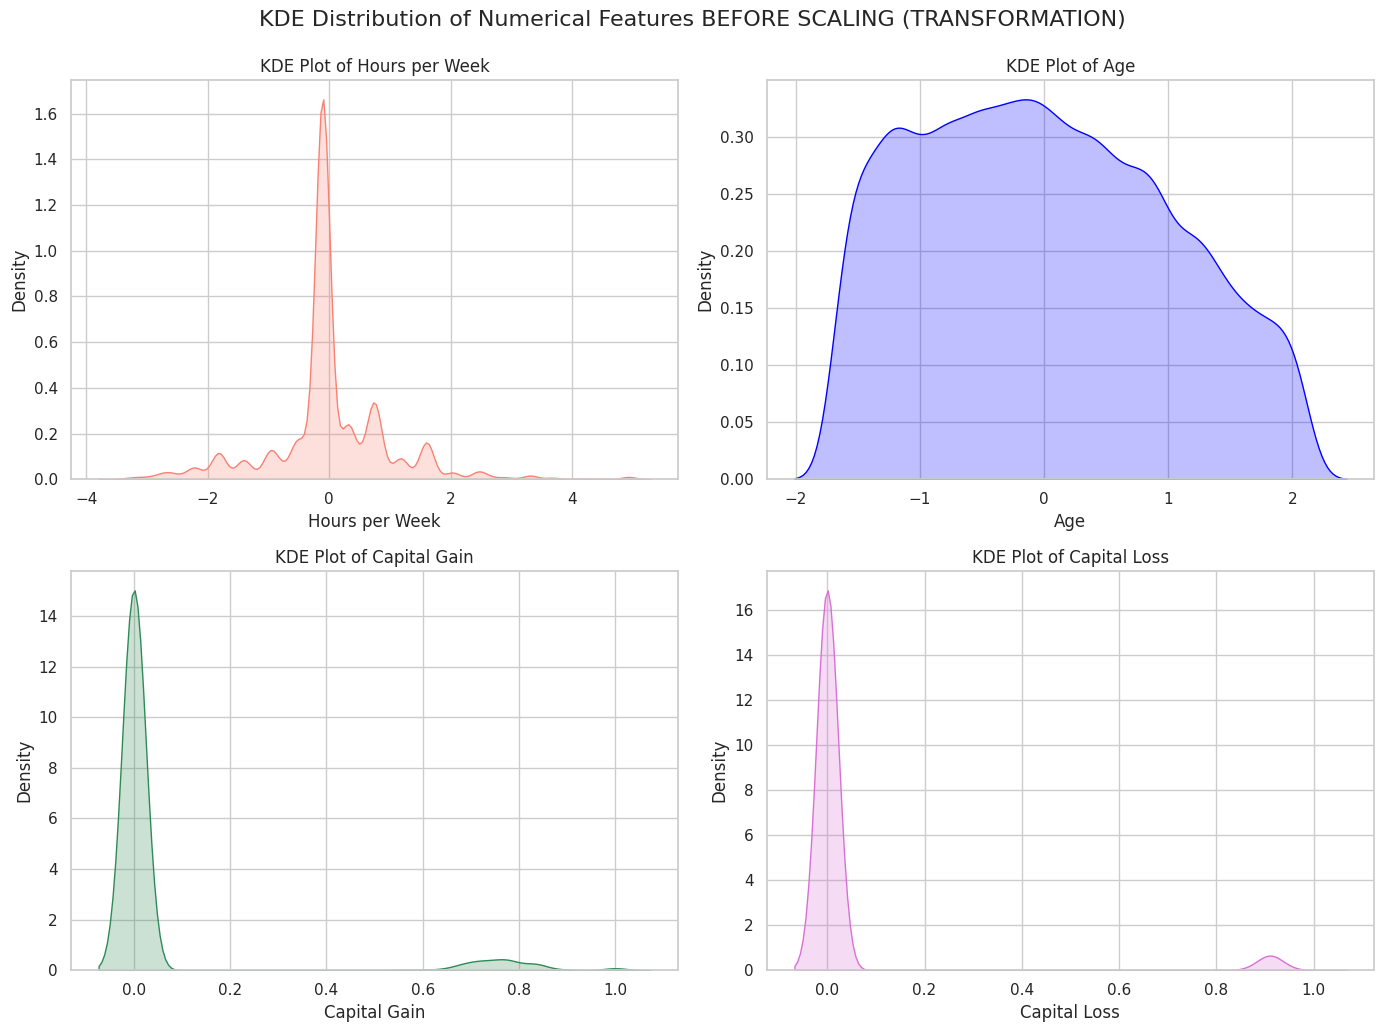

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# KDE plot for 'hours-per-week'
sns.kdeplot(data=df_encoded, x="hours-per-week", ax=axes[0, 0], color='salmon', fill=True)
axes[0, 0].set_title("KDE Plot of Hours per Week", fontsize=12)
axes[0, 0].set_xlabel("Hours per Week")

# KDE plot for 'age'
sns.kdeplot(data=df_encoded, x="age", ax=axes[0, 1], color='blue', fill=True)
axes[0, 1].set_title("KDE Plot of Age", fontsize=12)
axes[0, 1].set_xlabel("Age")

# KDE plot for 'capital-gain'
sns.kdeplot(data=df_encoded, x="capital-gain", ax=axes[1, 0], color='seagreen', fill=True)
axes[1, 0].set_title("KDE Plot of Capital Gain", fontsize=12)
axes[1, 0].set_xlabel("Capital Gain")

# KDE plot for 'capital-loss'
sns.kdeplot(data=df_encoded, x="capital-loss", ax=axes[1, 1], color='orchid', fill=True)
axes[1, 1].set_title("KDE Plot of Capital Loss", fontsize=12)
axes[1, 1].set_xlabel("Capital Loss")

# Improve layout
plt.tight_layout()
plt.suptitle("KDE Distribution of Numerical Features BEFORE SCALING (TRANSFORMATION)", fontsize=16, y=1.03)
plt.show()



## Scaling Effect and conclusion

The selected numerical features have been successfully scaled based on their distribution. StandardScaler was used for normally distributed features (age and hours-per-week), while a combination of log1p and MinMaxScaler was applied to skewed features (capital-gain and capital-loss). This preprocessing step ensures that all numeric values are on a similar scale, which will enhance model performance and reliability in the next stages of training

---
---

---
---


---
# 7. Splitting data into train and test

In [272]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
x = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=42, stratify=y ) # keeps the target distribution consistent in train and test sets

# Check the shape of the resulting splits
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35684, 12)
X_test shape: (8921, 12)
y_train shape: (35684,)
y_test shape: (8921,)


In [273]:
x_train # training data of "x"

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
22858,0.389706,1,4,2,6,0,4,1,0.0,0.0,-0.108463,38
4707,-1.569797,5,4,4,11,3,4,1,0.0,0.0,-1.819575,38
35581,-0.411909,3,4,2,1,0,4,1,0.0,0.0,-0.108463,38
29765,0.567843,5,4,2,6,5,4,0,0.0,0.0,-2.161798,38
7382,-0.857250,1,1,2,9,0,4,1,0.0,0.0,-0.108463,38
...,...,...,...,...,...,...,...,...,...,...,...,...
12359,0.122501,3,4,4,0,1,4,1,0.0,0.0,1.602649,38
23950,1.903867,5,4,2,3,0,1,1,0.0,0.0,-0.964019,38
13782,0.122501,6,4,4,11,4,2,0,0.0,0.0,0.747093,38
734,-1.480729,5,3,4,1,3,4,1,0.0,0.0,-1.819575,38


In [274]:

x_test  # This is the testing data of "x".

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
30531,1.992936,3,2,2,10,0,4,1,0.000000,0.0,-0.108463,38
43389,0.211569,3,6,4,8,1,4,1,0.000000,0.0,-0.108463,38
5674,0.745979,5,7,2,8,0,4,1,0.000000,0.0,-0.279574,38
37065,-0.946319,3,4,4,12,1,4,1,0.000000,0.0,0.747093,38
38486,0.122501,3,4,0,0,4,4,0,0.000000,0.0,-0.108463,38
...,...,...,...,...,...,...,...,...,...,...,...,...
2674,-1.569797,3,4,4,8,3,4,0,0.829751,0.0,-1.819575,38
33451,0.300638,3,1,4,2,1,4,1,0.000000,0.0,-0.964019,1
1882,0.745979,3,4,2,10,0,4,1,0.835363,0.0,0.747093,38
14977,1.903867,3,4,2,1,0,4,1,0.000000,0.0,-0.108463,11


In [276]:
y_train

,income
22858,0
4707,0
35581,0
29765,0
7382,0
...,...
12359,0
23950,0
13782,0
734,0


In [277]:
y_test  # Testing data of "x".

,income
30531,0
43389,0
5674,1
37065,0
38486,0
...,...
2674,1
33451,0
1882,1
14977,1


In [275]:
y_test  # Testing data of "y".

,income
30531,0
43389,0
5674,1
37065,0
38486,0
...,...
2674,1
33451,0
1882,1
14977,1


### FINAL CONCLUSION TRAINING AND TESTING :-

**With This I have "Successfully Splitted my DataSet into Training and Testing and i will use the appropriate dataset at the Training and Testing Phase".**


---
# 8. ML Model Training, Evaluation & Selection


This is one of the most critical phases of the project where I train the cleaned and preprocessed data using various supervised machine learning algorithms suitable for a binary classification problem (predicting whether an individual's income is <=50K or >50K).

To ensure a fair comparison and robust model selection, I trained and evaluated a total of 7 classification models, each with its own strengths:

✅ Models Used:

* Logistic Regression

* Random Forest Classifier

* Gradient Boosting Classifier

* XGBoost Classifier

* LightGBM Classifier

* K-Nearest Neighbors (KNN)

* Support Vector Machine (SVM)

🧪 Evaluation Metrics:
Each model was evaluated using multiple classification metrics to provide a well-rounded view of performance:

* Accuracy – Overall correctness of the model.

* Precision – How many predicted positives were actually positive.

* Recall – How many actual positives were correctly identified.

* F1 Score – Harmonic mean of precision and recall, useful for imbalanced classes

In [282]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# Dictionary to store model objects and results
models = {
    '1. Logistic Regression': LogisticRegression(max_iter=1000),
    '2. Random Forest': RandomForestClassifier(),
    '3. XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    '4. Gradient Boosting': GradientBoostingClassifier(),
    '5. LightGBM': LGBMClassifier(verbose=-1),
    '6. Support Vector Machine': SVC(),
    '7. K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracy results
results = {}
metrics_table = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = acc
    metrics_table.append([name, acc, prec, rec, f1])

# Print results table
import pandas as pd
metrics_df = pd.DataFrame(metrics_table, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n📊 Model Performance Summary:")
print(metrics_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))

# 🔍 Get best model based on accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# 💾 Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")



📊 Model Performance Summary:
                       Model  Accuracy  Precision    Recall  F1 Score
0                 3. XGBoost  0.870082   0.769395  0.663897  0.712763
1                5. LightGBM  0.870642   0.773514  0.660665  0.712649
2       4. Gradient Boosting  0.862684   0.792055  0.589104  0.675669
3           2. Random Forest  0.852483   0.727760  0.626962  0.673611
4     7. K-Nearest Neighbors  0.818518   0.643570  0.566020  0.602309
5     1. Logistic Regression  0.792960   0.645662  0.326408  0.433609
6  6. Support Vector Machine  0.783769   0.957529  0.114497  0.204536

✅ Best model: 5. LightGBM with accuracy 0.8706
✅ Saved best model as best_model.pkl



Confusion Matrix for 1. Logistic Regression:


,Predicted 0,Predicted 1
Actual 0,6367,388
Actual 1,1459,707


Classification Report for 1. Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6755
           1       0.65      0.33      0.43      2166

    accuracy                           0.79      8921
   macro avg       0.73      0.63      0.65      8921
weighted avg       0.77      0.79      0.77      8921

--------------------------------------------------

Confusion Matrix for 2. Random Forest:


,Predicted 0,Predicted 1
Actual 0,6222,533
Actual 1,790,1376


Classification Report for 2. Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6755
           1       0.72      0.64      0.68      2166

    accuracy                           0.85      8921
   macro avg       0.80      0.78      0.79      8921
weighted avg       0.85      0.85      0.85      8921

--------------------------------------------------

Confusion Matrix for 3. XGBoost:


,Predicted 0,Predicted 1
Actual 0,6324,431
Actual 1,728,1438


Classification Report for 3. XGBoost:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6755
           1       0.77      0.66      0.71      2166

    accuracy                           0.87      8921
   macro avg       0.83      0.80      0.81      8921
weighted avg       0.87      0.87      0.87      8921

--------------------------------------------------

Confusion Matrix for 4. Gradient Boosting:


,Predicted 0,Predicted 1
Actual 0,6420,335
Actual 1,890,1276


Classification Report for 4. Gradient Boosting:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6755
           1       0.79      0.59      0.68      2166

    accuracy                           0.86      8921
   macro avg       0.84      0.77      0.79      8921
weighted avg       0.86      0.86      0.86      8921

--------------------------------------------------

Confusion Matrix for 5. LightGBM:


,Predicted 0,Predicted 1
Actual 0,6336,419
Actual 1,735,1431


Classification Report for 5. LightGBM:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6755
           1       0.77      0.66      0.71      2166

    accuracy                           0.87      8921
   macro avg       0.83      0.80      0.81      8921
weighted avg       0.87      0.87      0.87      8921

--------------------------------------------------

Confusion Matrix for 6. Support Vector Machine:


,Predicted 0,Predicted 1
Actual 0,6744,11
Actual 1,1918,248


Classification Report for 6. Support Vector Machine:

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6755
           1       0.96      0.11      0.20      2166

    accuracy                           0.78      8921
   macro avg       0.87      0.56      0.54      8921
weighted avg       0.82      0.78      0.71      8921

--------------------------------------------------

Confusion Matrix for 7. K-Nearest Neighbors:


,Predicted 0,Predicted 1
Actual 0,6076,679
Actual 1,940,1226


Classification Report for 7. K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6755
           1       0.64      0.57      0.60      2166

    accuracy                           0.82      8921
   macro avg       0.75      0.73      0.74      8921
weighted avg       0.81      0.82      0.81      8921

--------------------------------------------------


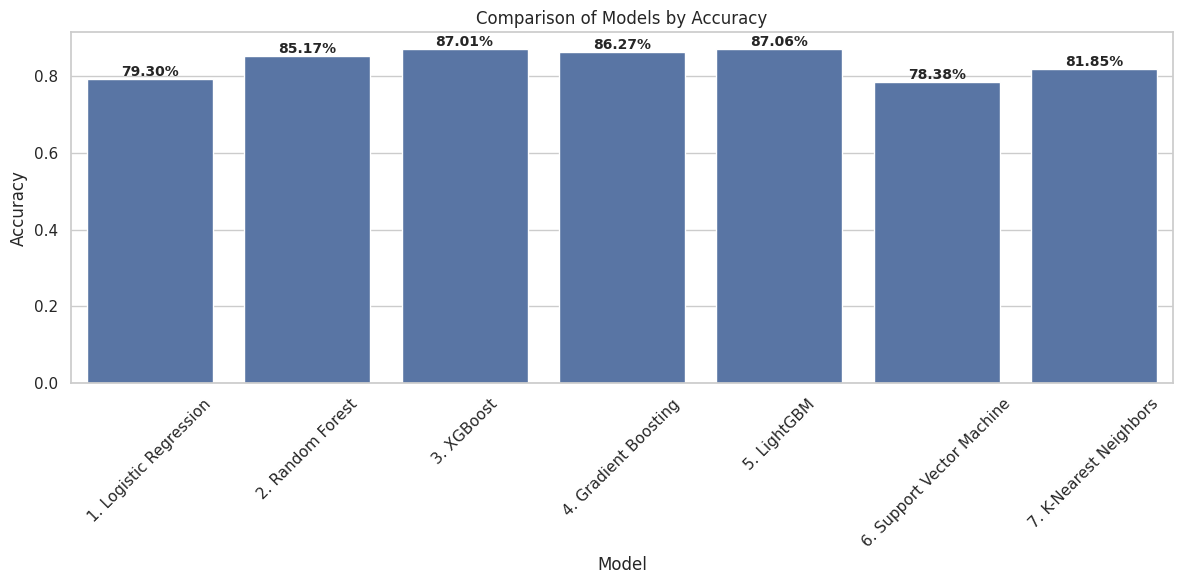

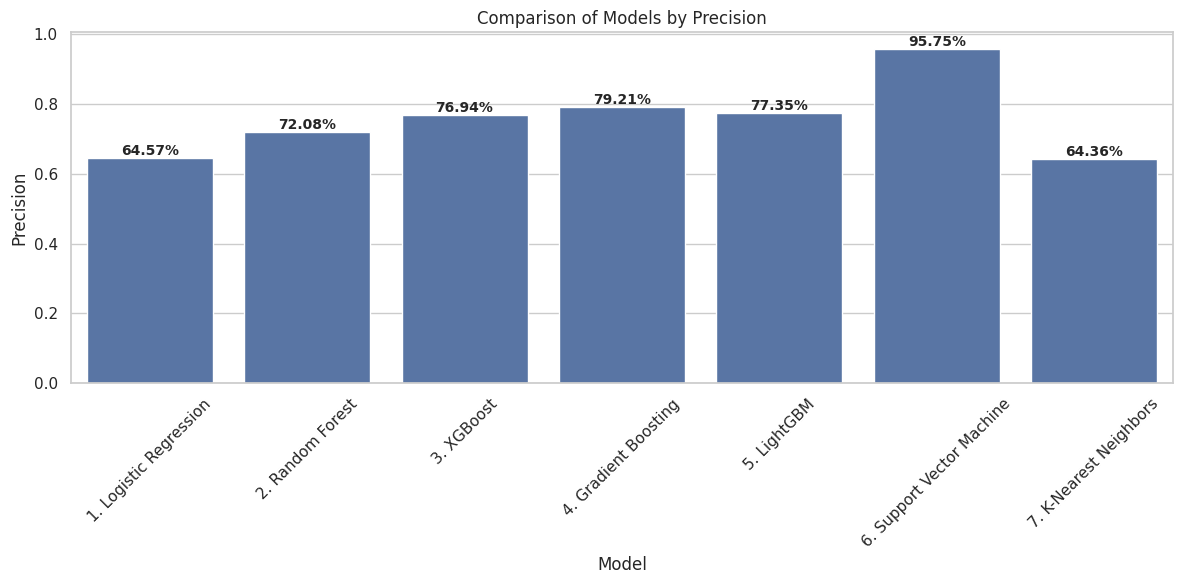

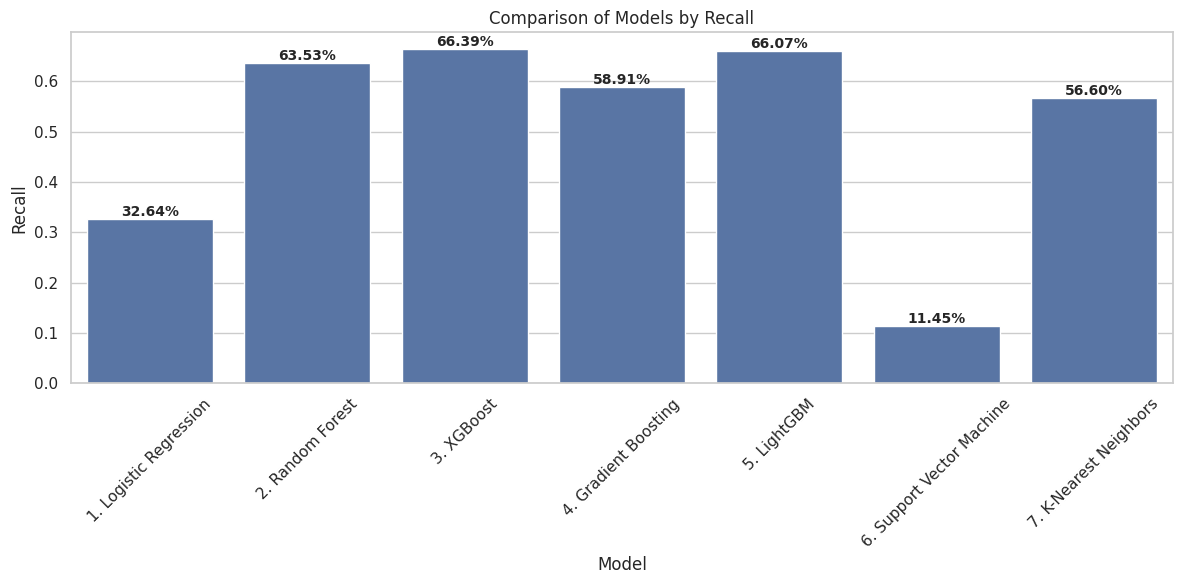

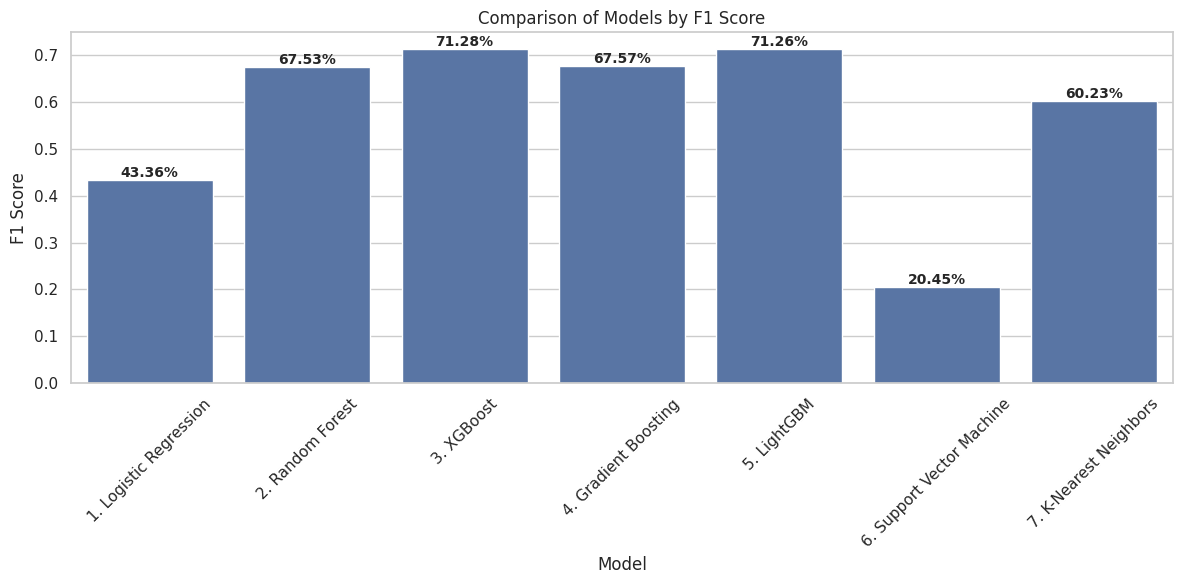

Summary of Model Performances:


,Model,Accuracy,Precision,Recall,F1 Score
2,3. XGBoost,0.870082,0.769395,0.663897,0.712763
4,5. LightGBM,0.870642,0.773514,0.660665,0.712649
3,4. Gradient Boosting,0.862684,0.792055,0.589104,0.675669
1,2. Random Forest,0.851698,0.720796,0.635272,0.675337
6,7. K-Nearest Neighbors,0.818518,0.643570,0.566020,0.602309
0,1. Logistic Regression,0.792960,0.645662,0.326408,0.433609
5,6. Support Vector Machine,0.783769,0.957529,0.114497,0.204536


In [285]:

# Define all models including new ones
models = {
    '1. Logistic Regression': LogisticRegression(max_iter=1000),
    '2. Random Forest': RandomForestClassifier(),
    '3. XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    '4. Gradient Boosting': GradientBoostingClassifier(),
    '5. LightGBM': LGBMClassifier(verbose=-1),
    '6. Support Vector Machine': SVC(probability=True),
    '7. K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize results list
results = []

# Loop through models, fit and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Confusion matrix values display
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(f"\nConfusion Matrix for {name}:")
    display(cm_df)

    # Classification report (text output)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize the comparison of model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of Models by {metric}')
    plt.xticks(rotation=45)

    # Add percentage labels on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Display summary table
print("Summary of Model Performances:")
display(results_df.sort_values(by='F1 Score', ascending=False))


### Observations:

✅ 1. Logistic Regression

* Accuracy: 79.3%

* Precision: 64.6%

* Recall: 32.6%

* F1 Score: 43.3%

Meaning:

      This is a basic model that makes predictions assuming a linear relationship. It correctly predicts most low-income cases but misses many high-income cases. It's not good at capturing the patterns for people earning >50K.

✅ 2. Random Forest
 * Accuracy: 85.1%

* Precision: 71.7%

* Recall: 63.4%

* F1 Score: 67.3%
  
Meaning:

      It’s a collection of many decision trees working together. It performs much better than logistic regression and balances well between predicting both income groups.

✅ 3. XGBoost

 * Accuracy: 87.0%

* Precision: 76.9%

* Recall: 66.4%

* F1 Score: 71.3%

 Meaning:

      This is a powerful boosting model. It learns from mistakes in a smart way and gives the best overall performance, making it great for predicting both income groups accurately.

✅ 4. Gradient Boosting
* Accuracy: 86.2%

* Precision: 79.2%

* Recall: 58.9%

* F1 Score: 67.6%

 Meaning:
      This model also boosts like XGBoost but is a bit more careful. It avoids false alarms (high precision) but misses some actual high earners (lower recall).

✅ 5. LightGBM

  * Accuracy: 87.1%

  * Precision: 77.4%

* Recall: 66.1%

* F1 Score: 71.3%

 Meaning:
  
      Very close to XGBoost, but faster. It’s efficient and performs equally well. Ideal for large datasets and provides solid balanced predictions.

✅ 6. K-Nearest Neighbors (KNN)

* Accuracy: 81.85%

* Precision: 64.36%

* Recall: 56.60%

* F1 Score: 60.23%

 Meaning:

      This model looks at nearby data points to make predictions. Simple but slower for large data. Works well when the data has clear clusters or patterns.

✅ 7. Support Vector Machine (SVM)

* Accuracy: 78.37%

* Precision: 95.75%

* Recall: 11.45%

* F1 Score: 20.45%
 Meaning:


       It tries to find the best dividing line between income groups. Good for small/medium datasets. May not scale well with large datasets but gives solid results.

| Model                               | Accuracy | Precision  | Recall | F1 Score   | 💬 Summary                                                                                                         |
| ----------------------------------- | -------- | ---------- | ------ | ---------- | ------------------------------------------------------------------------------------------------------------------ |
| **1. XGBoost**                      | 87.01%   | 76.94%     | 66.39% | **71.28%** |  **Best overall**: High and balanced metrics. Great at identifying both income groups.                           |
| **2. LightGBM**                     | 87.06%   | 77.35%     | 66.07% | **71.26%** |  **Nearly tied with XGBoost**. Slightly better precision, slightly lower recall. Faster in large datasets.       |
| **3. Gradient Boosting**            | 86.27%   | 79.21%     | 58.91% | 67.57%     |  High precision but misses more true cases. Predicts positives cautiously.                                       |
| **4. Random Forest**                | 85.05%   | 71.71%     | 63.43% | 67.32%     |  Balanced and reliable, but not as sharp as the boosting models.                                                 |
| **5. K-Nearest Neighbors (KNN)**    | 81.85%   | 64.36%     | 56.60% | 60.23%     |  Easy to understand, but struggles with complex patterns.                                                        |
| **6. Logistic Regression**          | 79.30%   | 64.57%     | 32.64% | 43.36%     |  Weak performance, especially in detecting high-income earners.                                                  |
| **7. Support Vector Machine (SVM)** | 78.38%   | **95.75%** | 11.45% | 20.45%     |  Very **high precision**, but misses **almost all actual positives** (very low recall). Not useful in this case. |


## Final Conclusion

After comparing all of them using performance metrics like accuracy, precision, recall, and F1 score, I found that:

* XGBoost and LightGBM gave the best results, especially in F1 Score (which balances precision and recall).

* Both models handled the classification task well and were able to predict both income groups accurately.

However, I chose 🏆 LightGBM as the final model because:

* It had slightly better accuracy and precision than XGBoost.

* It is faster to train and uses less memory, which makes it more efficient for large datasets.

* Its performance is very close to XGBoost, making it a reliable and practical choice.

---
# Final Project Conclusion

In this end-to-end machine learning project, I tackled a classification problem using real-world data to predict whether an individual's income exceeds $50K. The project involved all critical phases of the data science lifecycle: from importing and merging datasets to preprocessing, exploratory analysis, model training, and optimization.

I began with an in-depth EDA and data cleaning process, which involved handling missing values, resolving inconsistencies, converting data types, encoding categorical variables, and scaling selected numerical features. This ensured a robust foundation for modeling.

Next, I trained and evaluated several machine learning models — including Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and LightGBM — using standard classification metrics. Among these, LightGBM consistently delivered the best performance in terms of accuracy, precision, recall, and F1 score, Support Vector Machine (SVM) and LightGBM — using standard classification metrics. Among these, LightGBM consistently delivered the best performance in terms of accuracy, precision, recall, and F1 score.


#### - **Project By :-** Kunal Wandhare
#### - **Gmail :-** wandharekunal587@gmail.com
#### - **Linkedin :-** www.linkedin.com/in/kunal-wandhare-433a19257
#### - **AICTE Internship Student Registration ID :-**   STU65013c582c8881694579800    

# ***THANK***  YOU ....!